# Census Income Category Prediction

In [131]:
#import Libraries

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')

In [133]:
# import data

In [134]:
df=pd.read_csv(r'C:\Users\SURAJ\Desktop\jupyter\projects\Decision tree\Data.csv')

In [135]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [136]:
df.shape

(32561, 15)

In [137]:
df.size

488415

In [138]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education.num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital.gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital.loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [140]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [141]:
# there is no null values in data but we see there is '?' in some columns lets check

In [142]:
# CHECK ? IN COLUMNS
for col in df:
  count=0
  for i in df[col]:
    if i == '?':
      count+=1
  print(f'{col}: {count}')

age: 0
workclass: 1836
fnlwgt: 0
education: 0
education.num: 0
marital.status: 0
occupation: 1843
relationship: 0
race: 0
sex: 0
capital.gain: 0
capital.loss: 0
hours.per.week: 0
native.country: 583
income: 0


In [143]:
# we know that there are 1836 "?" in workclass, 1843 in occupation and 583 in native.country so we have to replace them with values

In [144]:
# replace values in workclass
df['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [145]:
df['workclass'] = np.where(df['workclass']=='?', df['workclass'].mode(), df['workclass'])
df['workclass']

0        Private
1        Private
2        Private
3        Private
4        Private
          ...   
32556    Private
32557    Private
32558    Private
32559    Private
32560    Private
Name: workclass, Length: 32561, dtype: object

In [146]:
df['workclass'].value_counts()

Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [147]:
# replace values in native country
df['native.country'].value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                      

In [148]:
df['native.country'] = np.where(df['native.country']=='?', df['native.country'].mode(), df['native.country'])
df['native.country']

0        United-States
1        United-States
2        United-States
3        United-States
4        United-States
             ...      
32556    United-States
32557    United-States
32558    United-States
32559    United-States
32560    United-States
Name: native.country, Length: 32561, dtype: object

In [149]:
df['native.country'].value_counts()

United-States                 29753
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                           29
France                      

In [150]:
df['education'].value_counts()

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [151]:
df['education.num'].value_counts()

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education.num, dtype: int64

In [152]:
# eduction and eduction num are giving the same information so we can write it down like this:-
# The highest level of education achieved in numerical form.

# Preschool      - 1
# 1st-4th        - 2
# 5th-6th        - 3
# 7th-8th        - 4
# 9th            - 5
# 10th           - 6
# 11th           - 7
# 12th           - 8
# HS-grad        - 9
# Some-college   - 10
# Assoc-voc      - 11
# Assoc-acdm     - 12
# Bachelors      - 13
# Masters        - 14
# Prof-school    - 15
# Doctorate      - 16

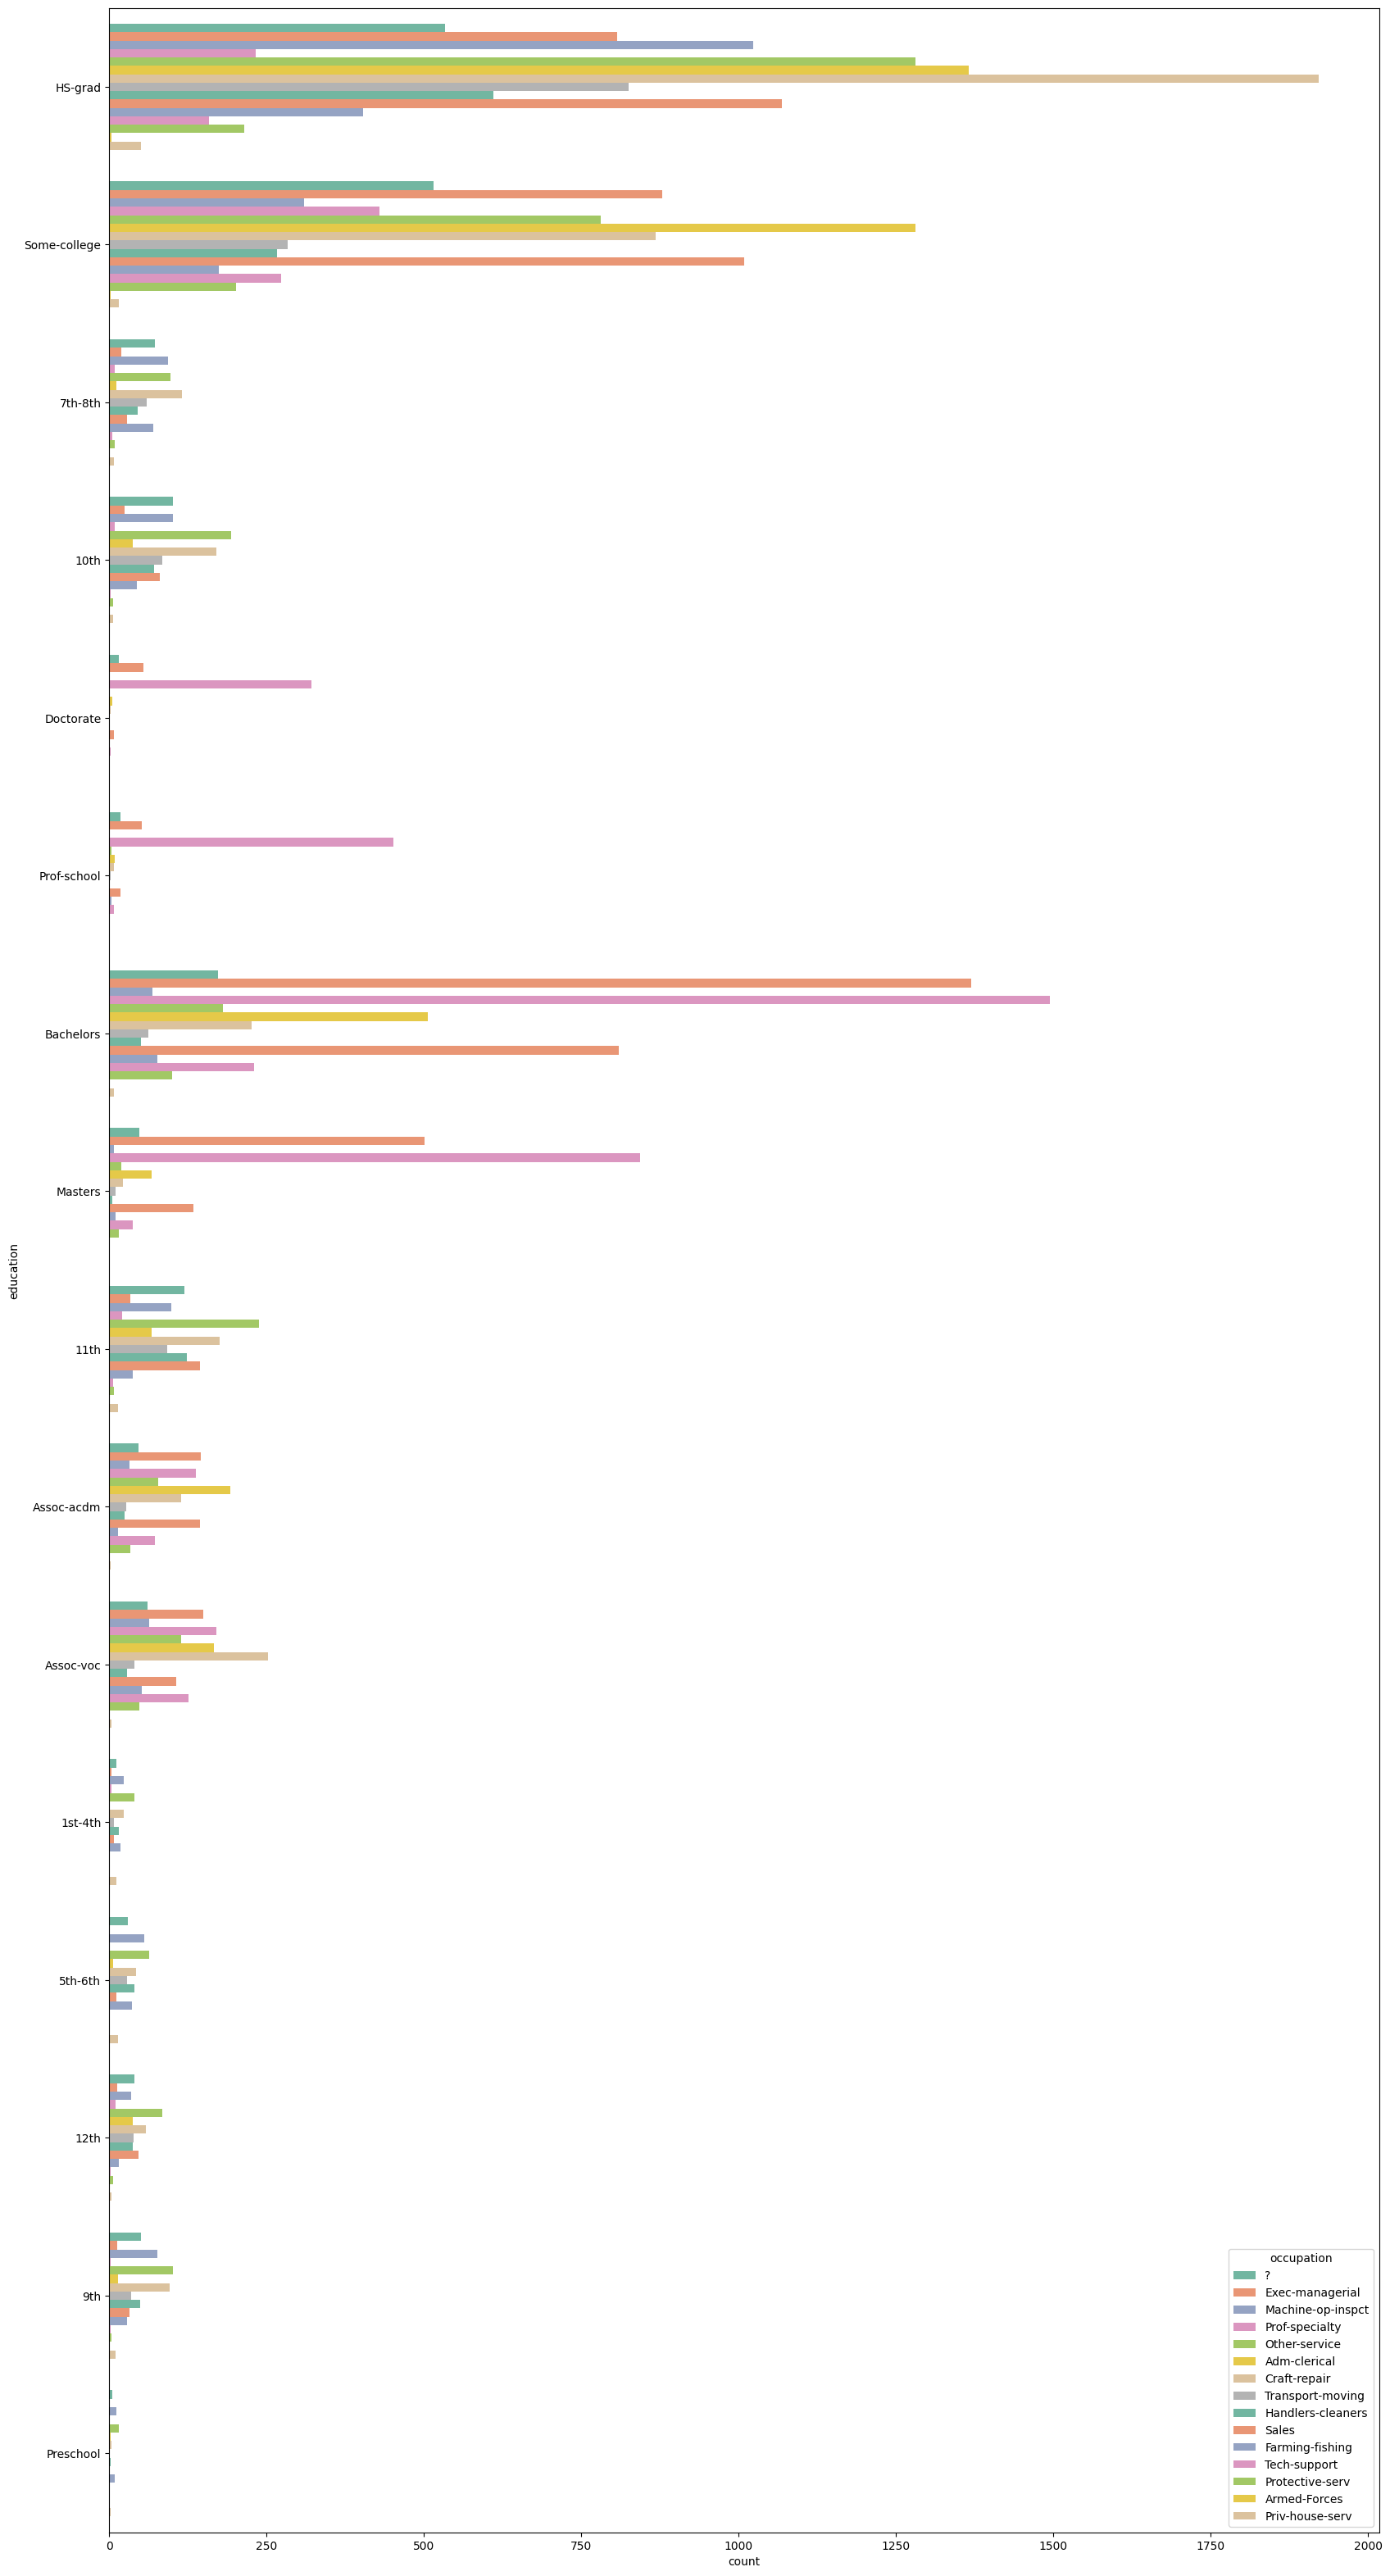

In [153]:
# visualize occupation based on education
plt.figure(figsize=(20,40))
sns.countplot(data=df, hue='occupation',y= 'education', palette='Set2')
plt.show()

1) Majority of the people who done their education in HS-grad, 7th-8th, Assoc-voc working in craft-repair.

2) Majority of the people who done their education in Some-college, Assoc-acdm working in Adm-clerical.

3) Majority of the people who done their education in 10th, 11th, 1st-4th, 5th-6th, 12th, 9th, Preschool working in Other-services.

4) Majority of the people who done their education in Doctorate ,Prof-school, Bachelors, Masters working in Prof-specialty.

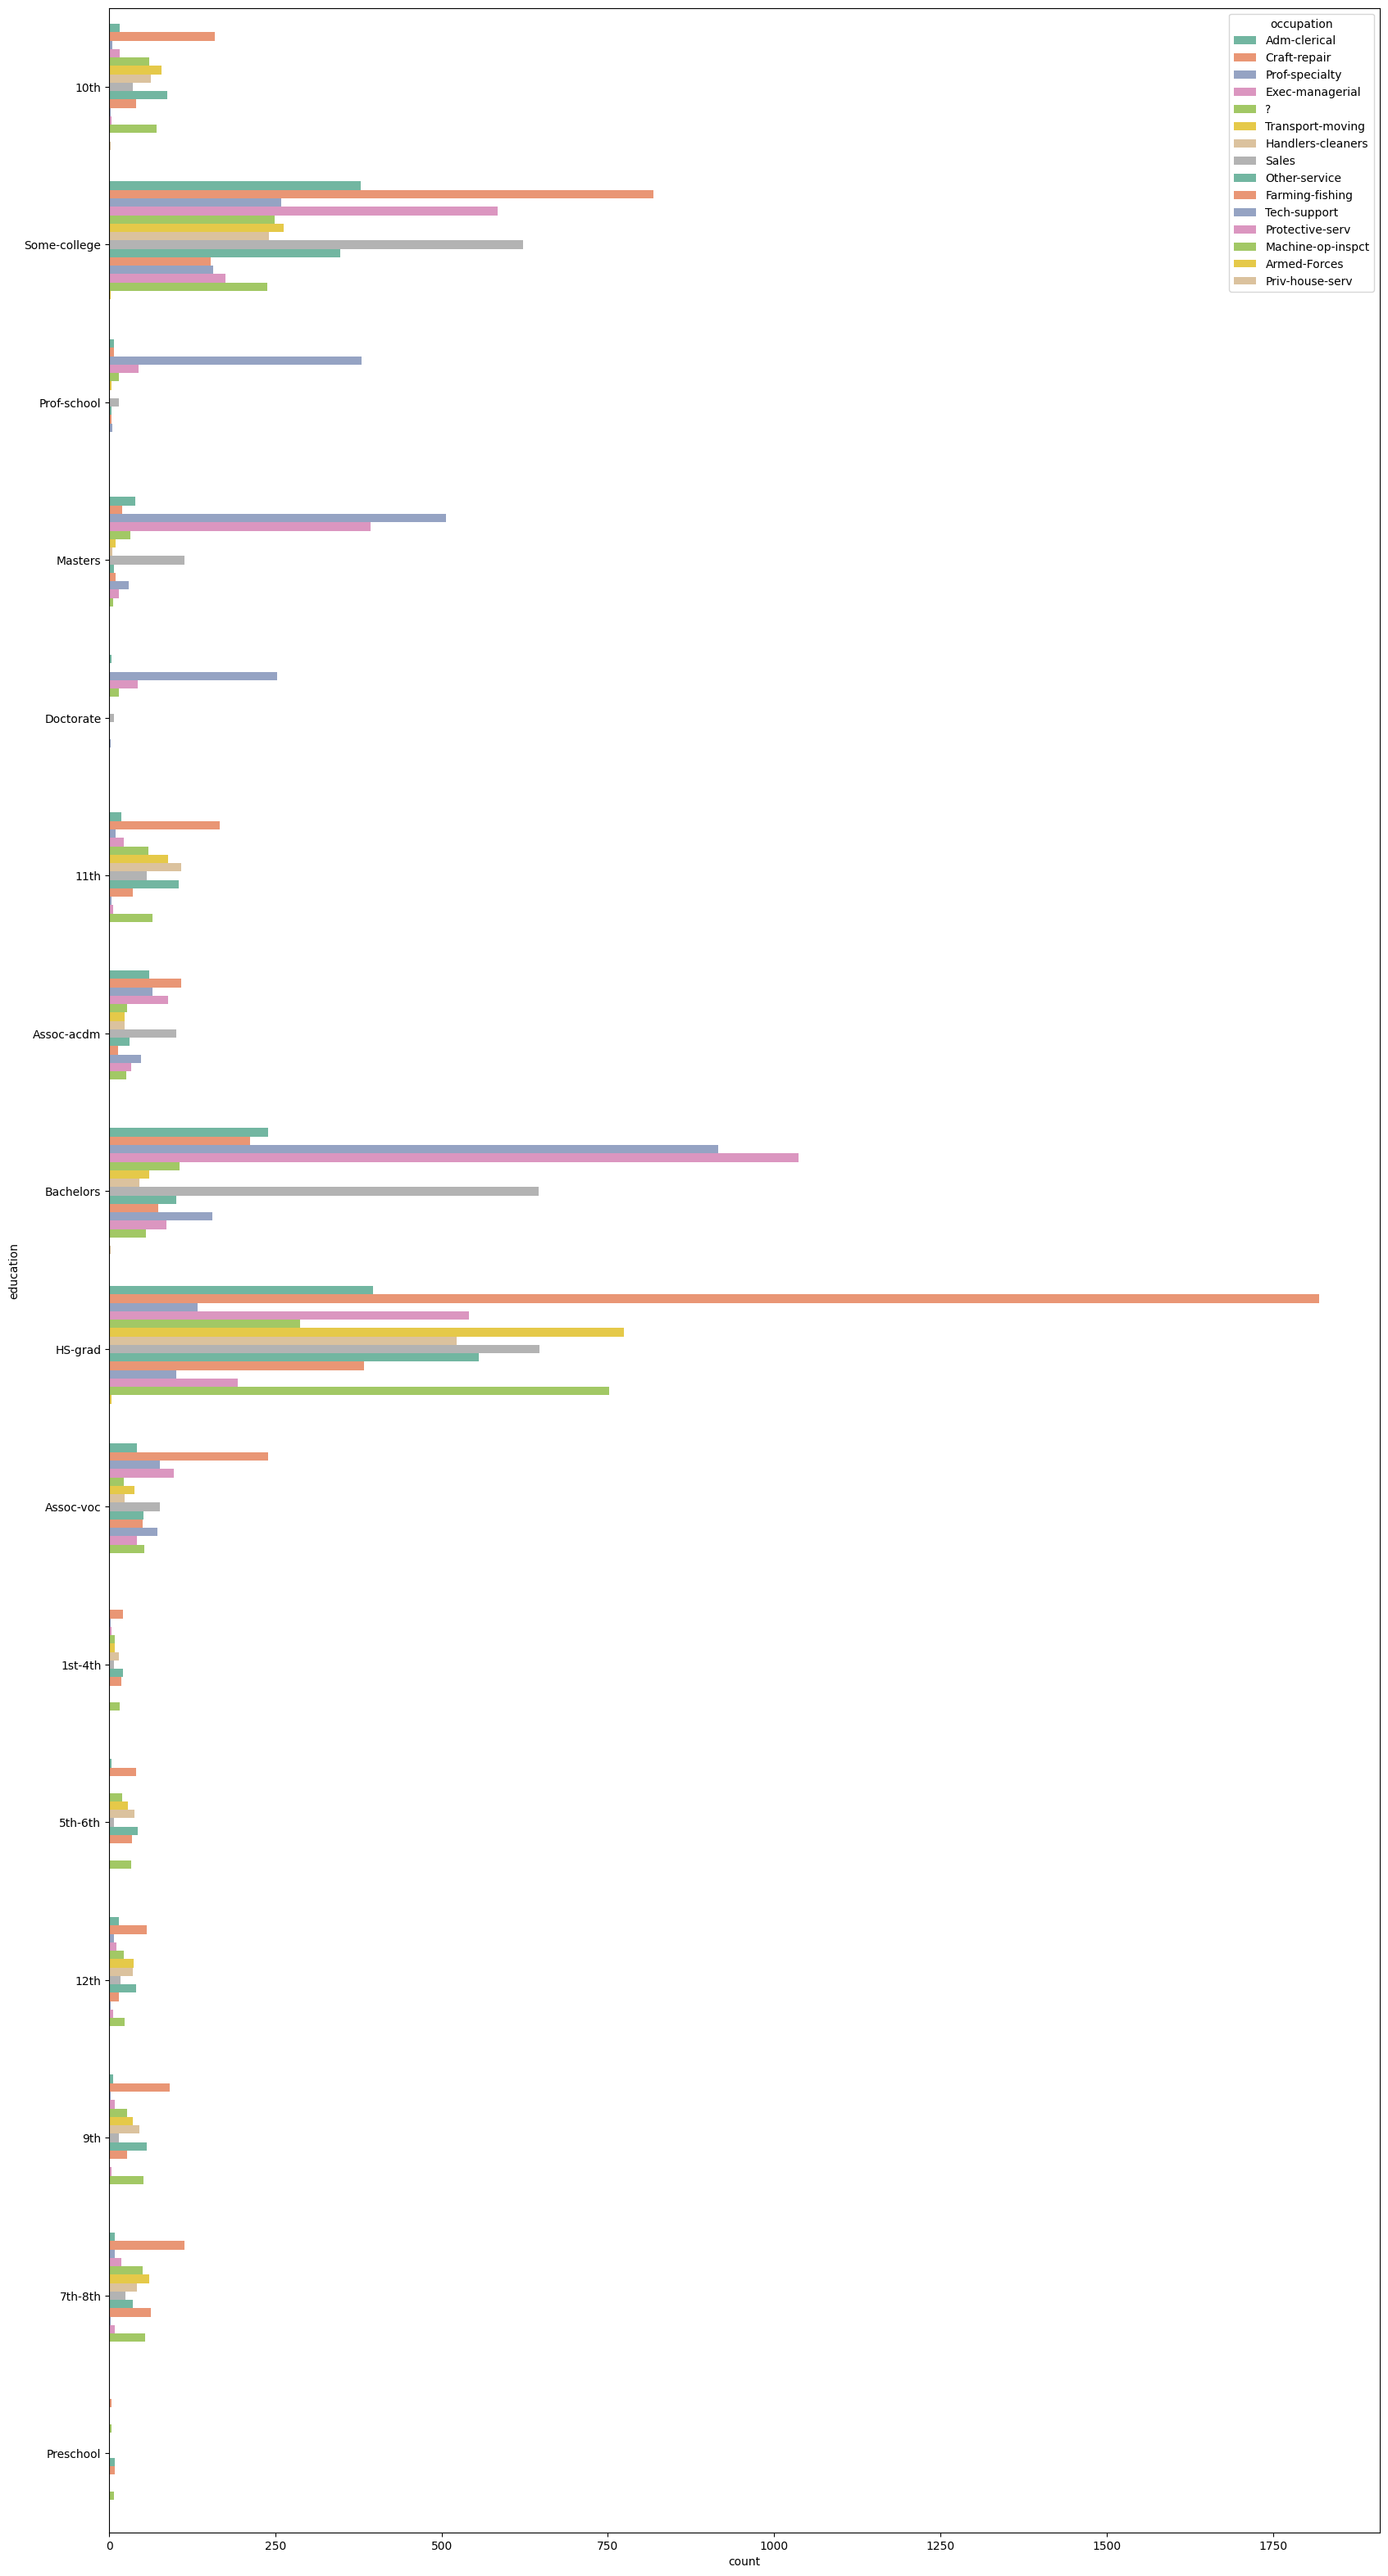

In [154]:
# Checking relation between education and occupation only of mens.

plt.figure(figsize=(20,40))
sns.countplot(data=df[df['sex']=='Male'], y='education', hue='occupation', palette='Set2')
plt.show()

1) Majority of the mens who done their education in 10th, Some-college, 11th, Assoc-acdm, HS-grad, Assoc-voc, 1st-4th, 12th, 9th, 7th-8th working in craft-repair.

2) Majority of the mens who done their education in Bachelors working in Exec-managerial.

3) Majority of the mens who done their education in 5th-6th, Preschool working in Other-services.

4) Majority of the mens who done their education in Prof-school, Masters, Doctorate working in Prof-specialty.

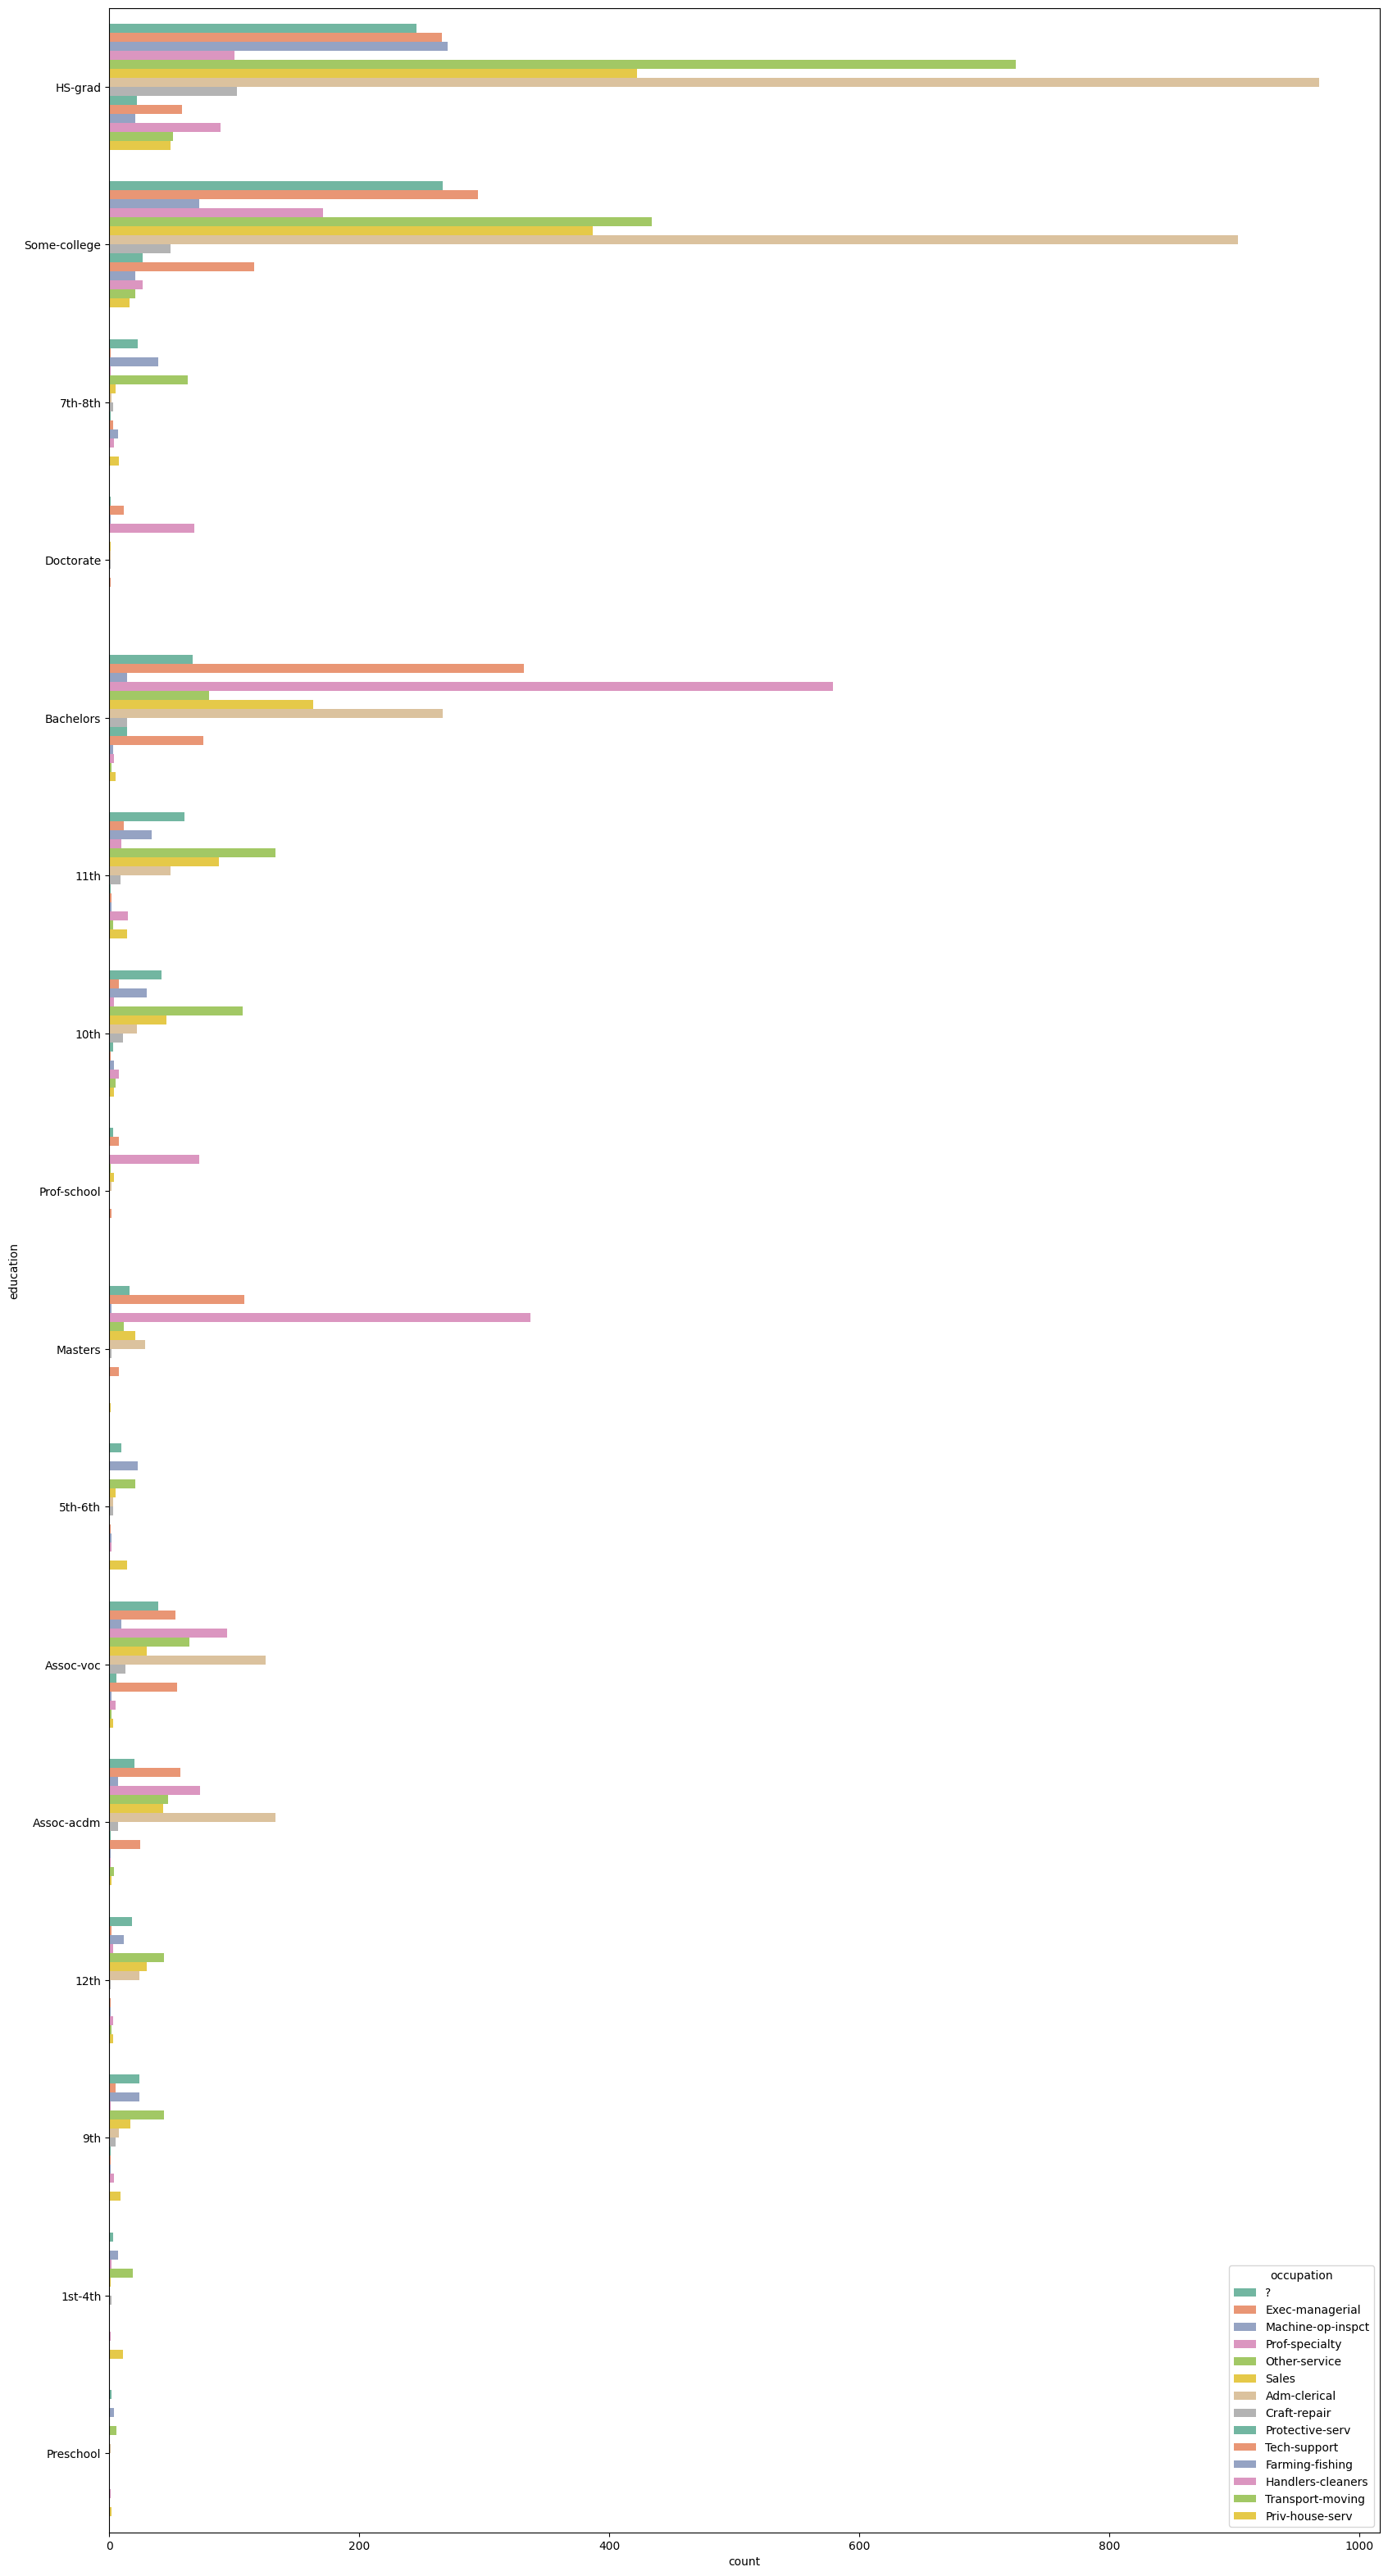

In [155]:
# Checking relation between education and occupation only of Females.

plt.figure(figsize=(20,40))
sns.countplot(data=df[df['sex']=='Female'], y='education', hue='occupation', palette='Set2')
plt.show()

1) Majority of the mens who done their education in HS-grad, Some-college, Assoc-voc, Assoc-acdm working in Adm-clerical.

2) Majority of the mens who done their education in 5th-6th working in Machine-op-inspct.

3) Majority of the mens who done their education in 7th-8th, 11th, 10th, 12th, 9th, 1st-4th, preschool working in Other-services.

4) Majority of the mens who done their education in Doctorate, Bachelors, Prof-school, Masters working in Prof-specialty.

In [156]:
df['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [157]:
# writing a code to replace '?' in occupation column.

ll=[]
for i in range(len(df)):
  if df['occupation'][i]=='?':
    if df['sex'][i]=='Male':
      if df['education'][i]=='Prof-school' or df['education'][i]=='Masters' or df['education'][i]=='Doctorate':
        v = 'Prof-specialty'
      elif df['education'][i]=='5th-6th' or df['education'][i]=='Preschool':
        v = 'Other-service'
      elif df['education'][i]=='Bachelors':
        v = 'Exec-managerial'
      else:
        v = 'Craft-repair'

    else:
      if df['education'][i]=='HS-grad' or df['education'][i]=='Some-college' or df['education'][i]=='Assoc-voc' or df['education'][i]=='Assoc-acdm':
        v = 'Adm-clerical'
      elif df['education'][i]=='Doctorate' or df['education'][i]=='Bachelors' or df['education'][i]=='Prof-school' or df['education'][i]=='Masters':
        v = 'Prof-specialty'
      elif df['education'][i]=='5th-6th':
        v = 'Machine-op-inspct'
      else:
        v = 'Other-service'

  else:
    v = df['occupation'][i]
  ll.append(v)

In [158]:
df['occupation']=ll

In [159]:
df['occupation'].value_counts()

Craft-repair         4911
Adm-clerical         4342
Prof-specialty       4288
Exec-managerial      4172
Sales                3650
Other-service        3490
Machine-op-inspct    2012
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

# Visualiaztion

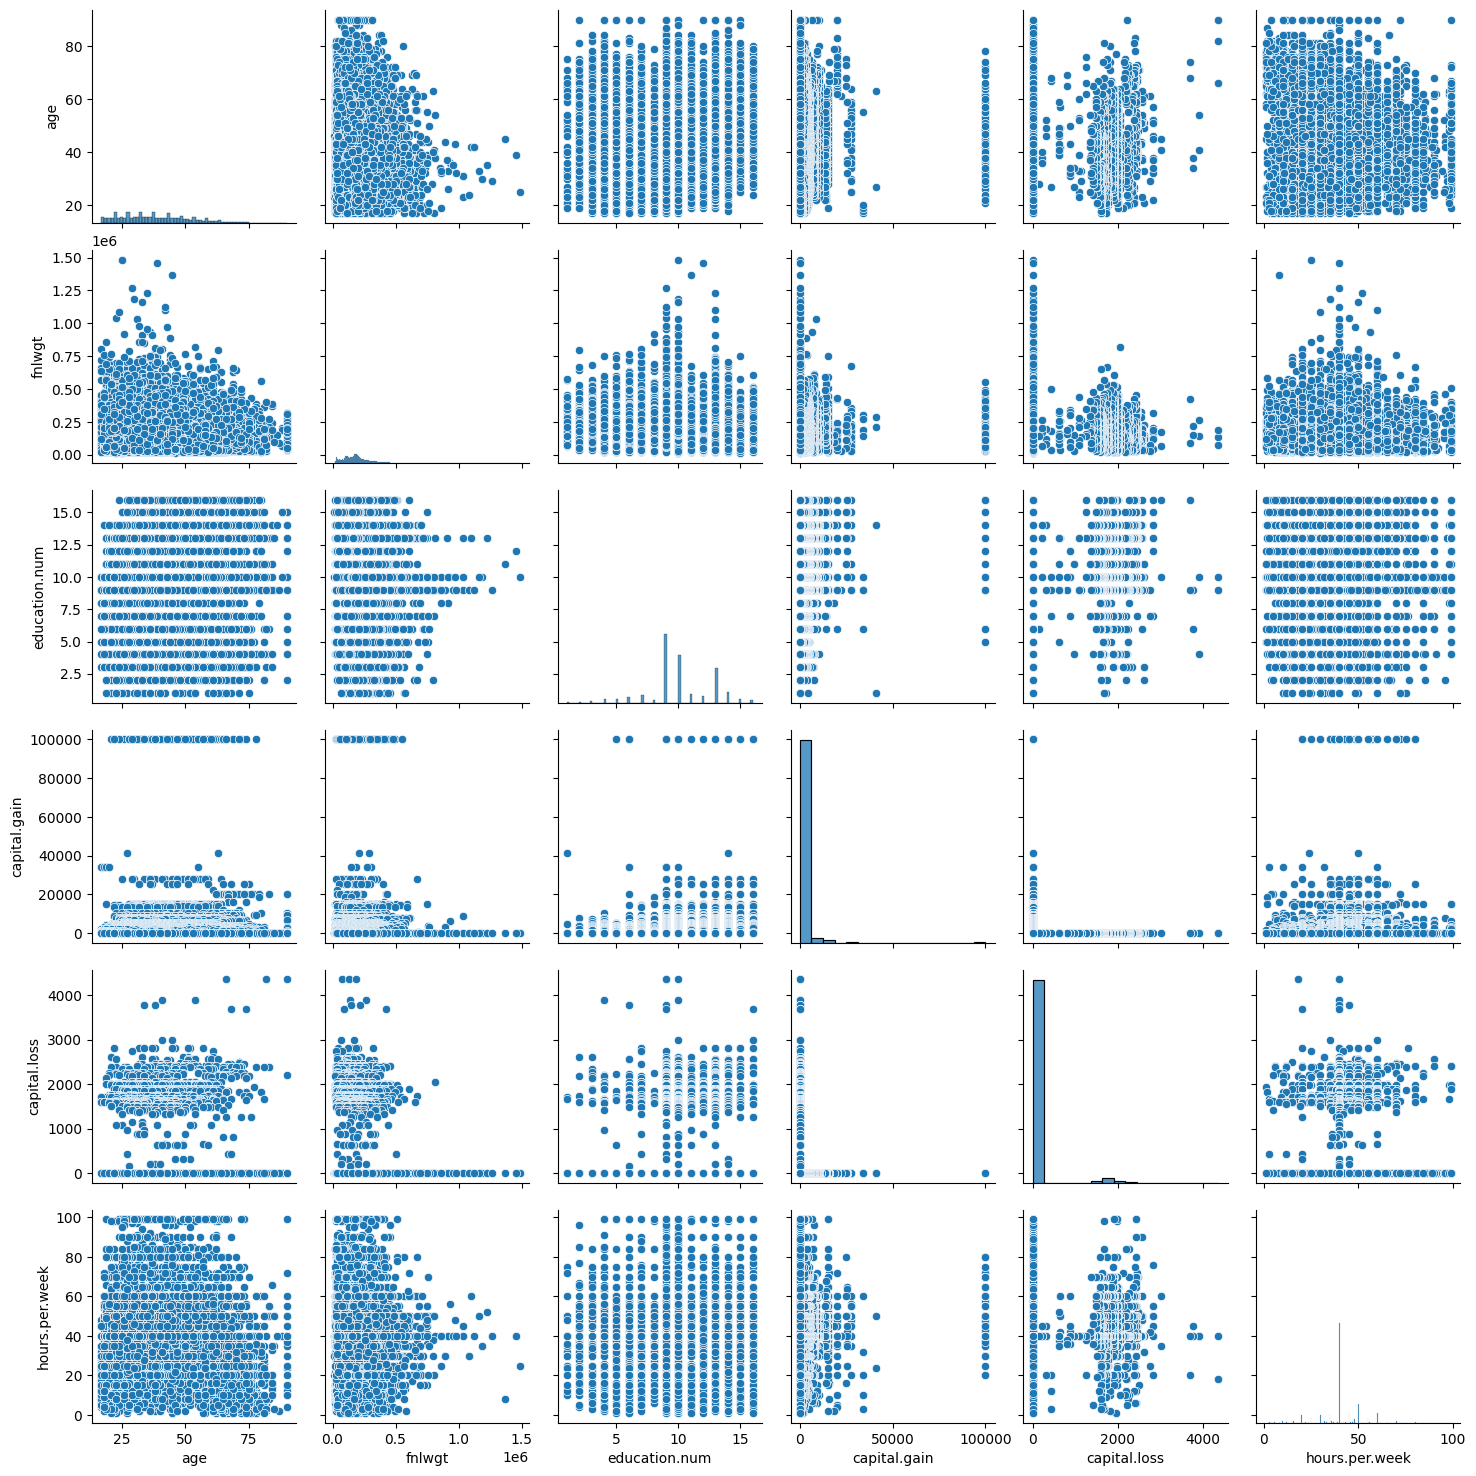

In [160]:
sns.pairplot(df)

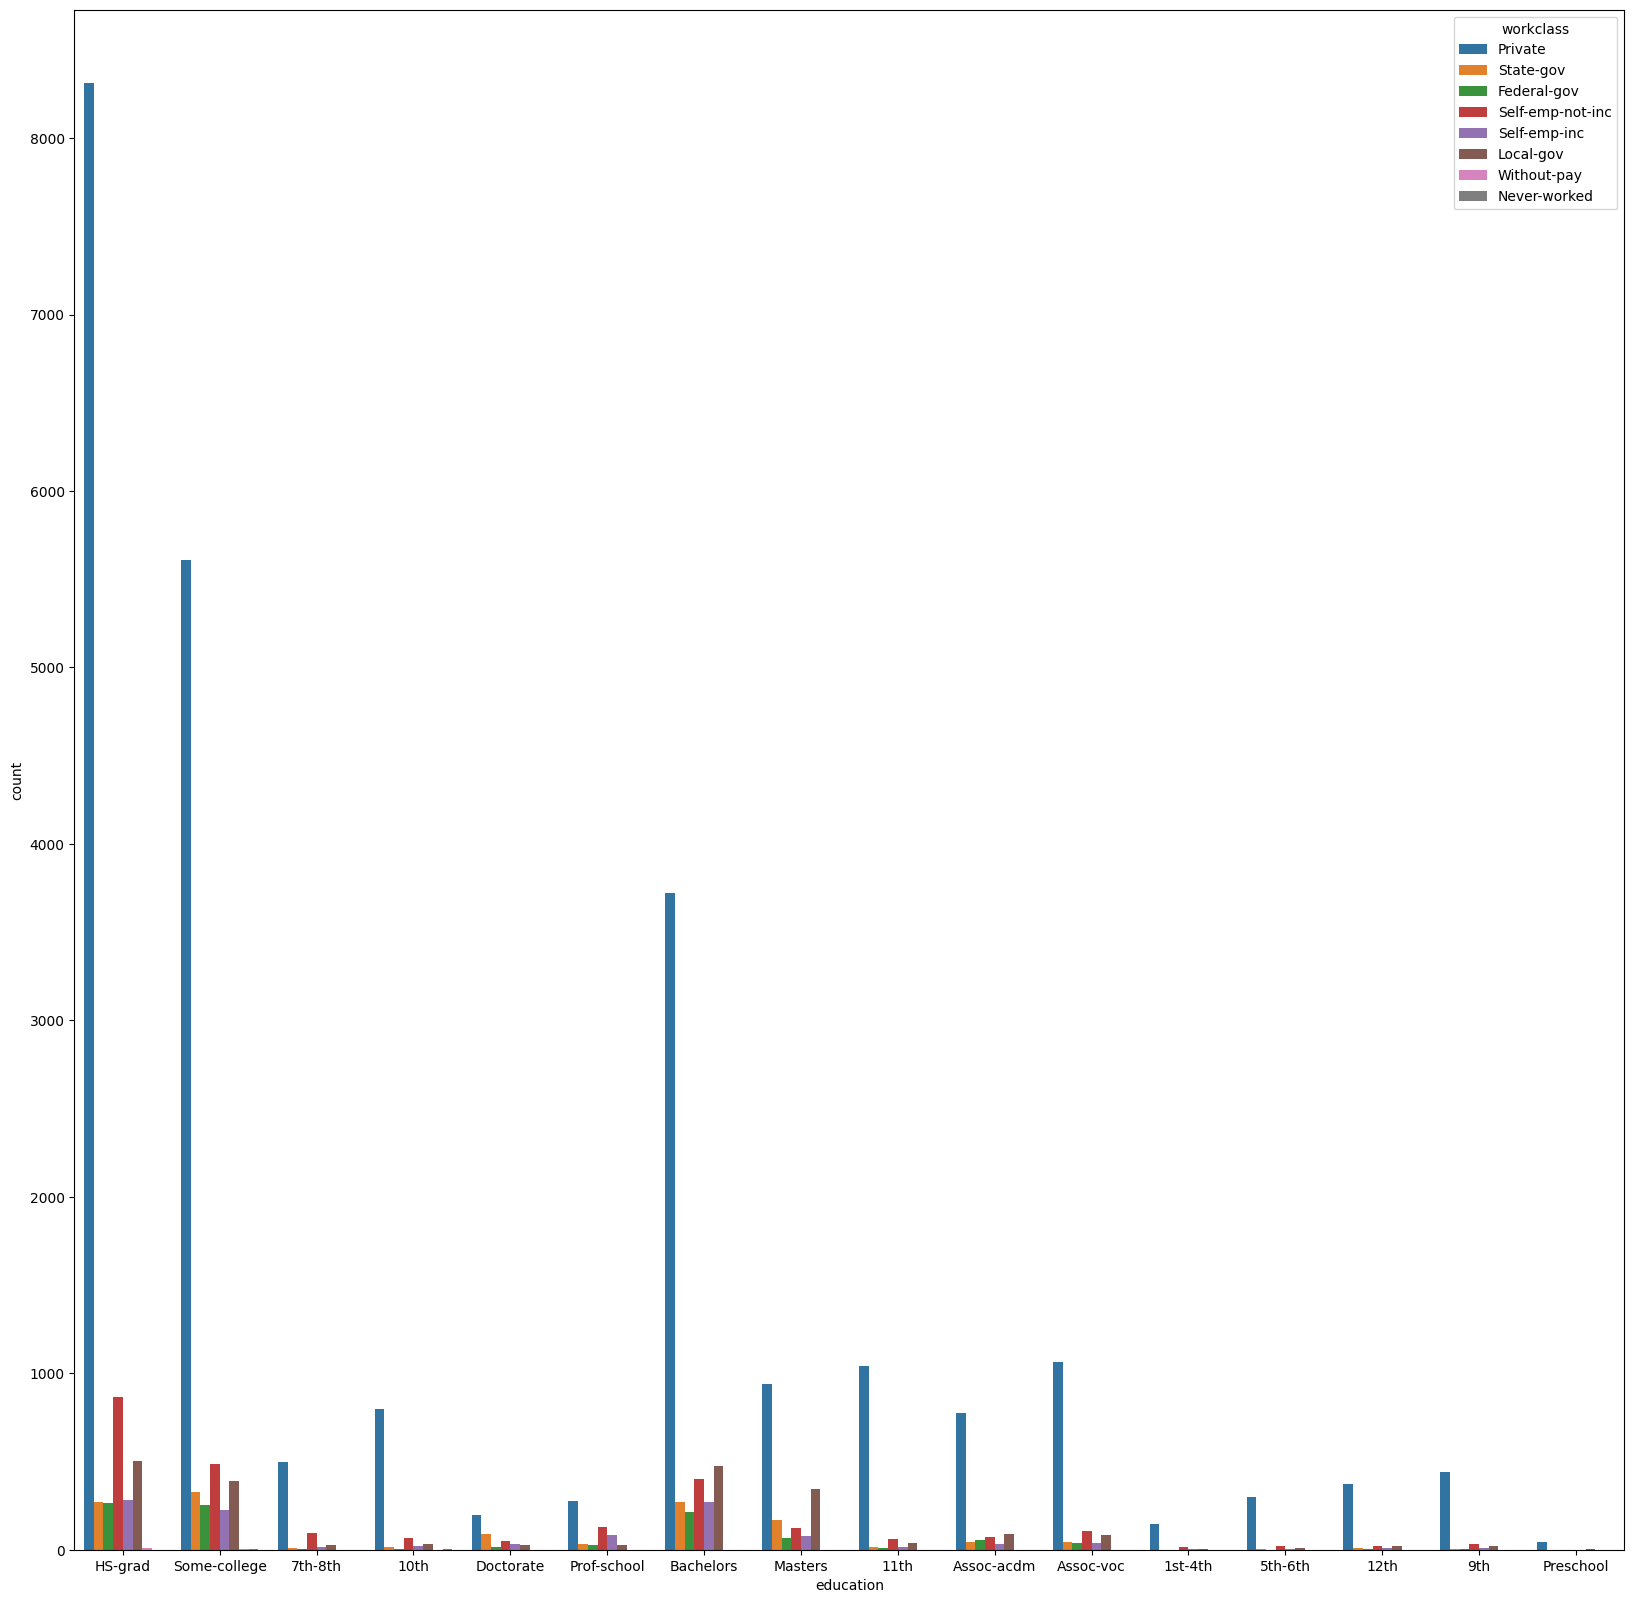

In [161]:
plt.figure(figsize=(20,20))
sns.countplot(data=df, x='education', hue='workclass')
plt.show()

# Most of the population from various education background are working in private sector.

<AxesSubplot: xlabel='occupation', ylabel='count'>

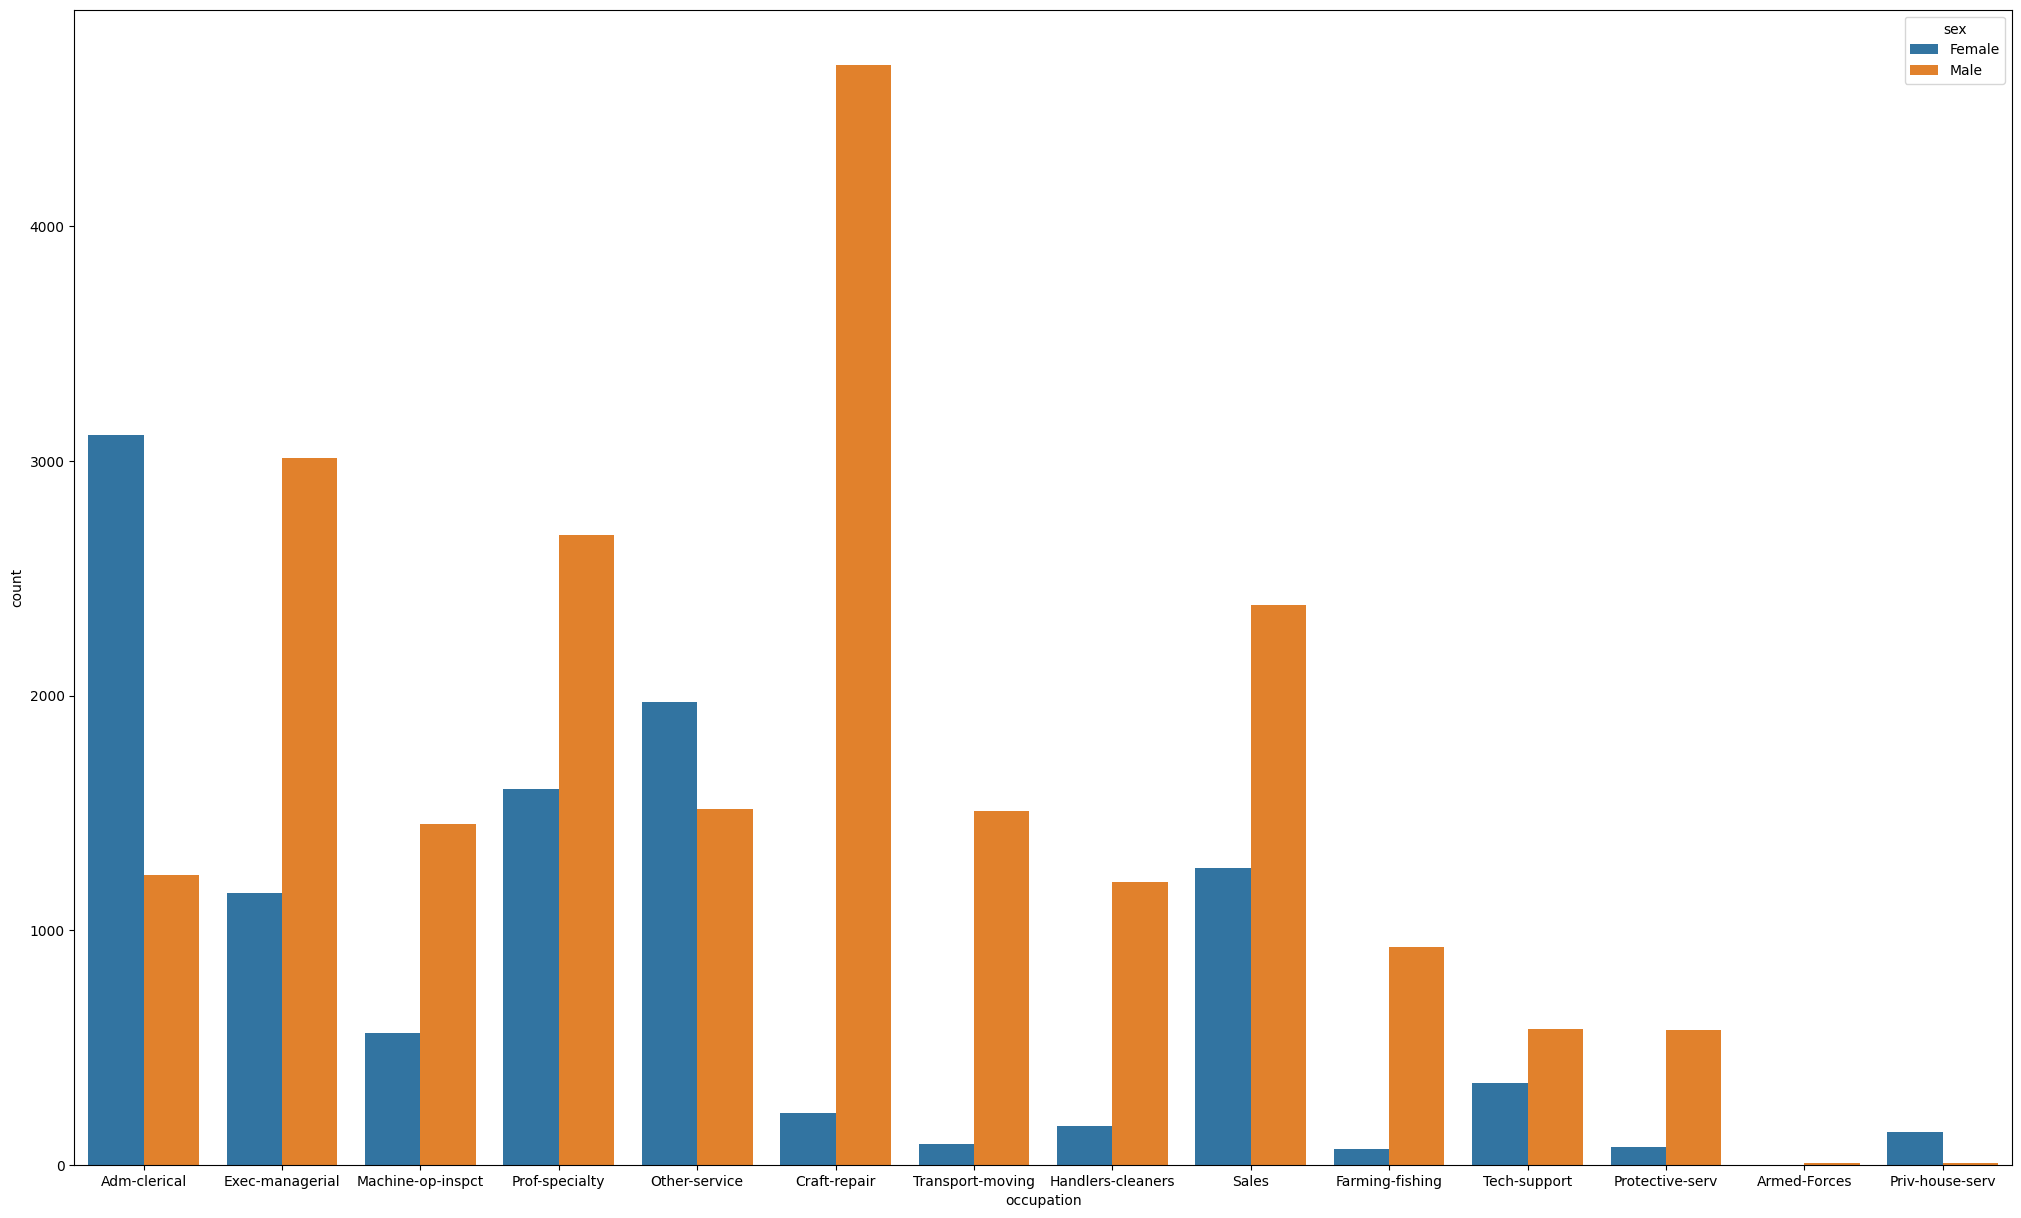

In [162]:
# Checking relationship between occupation and sex column.
plt.figure(figsize=(25,15))
sns.countplot(data=df, x='occupation', hue='sex')

# Other-service, Adm-clerical, Priv-house-serv in these sectors female members are more than mens.

In [163]:
df['race'].value_counts()

White                 27816
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

In [164]:
df['native.country'].value_counts()

United-States                 29753
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                           29
France                      

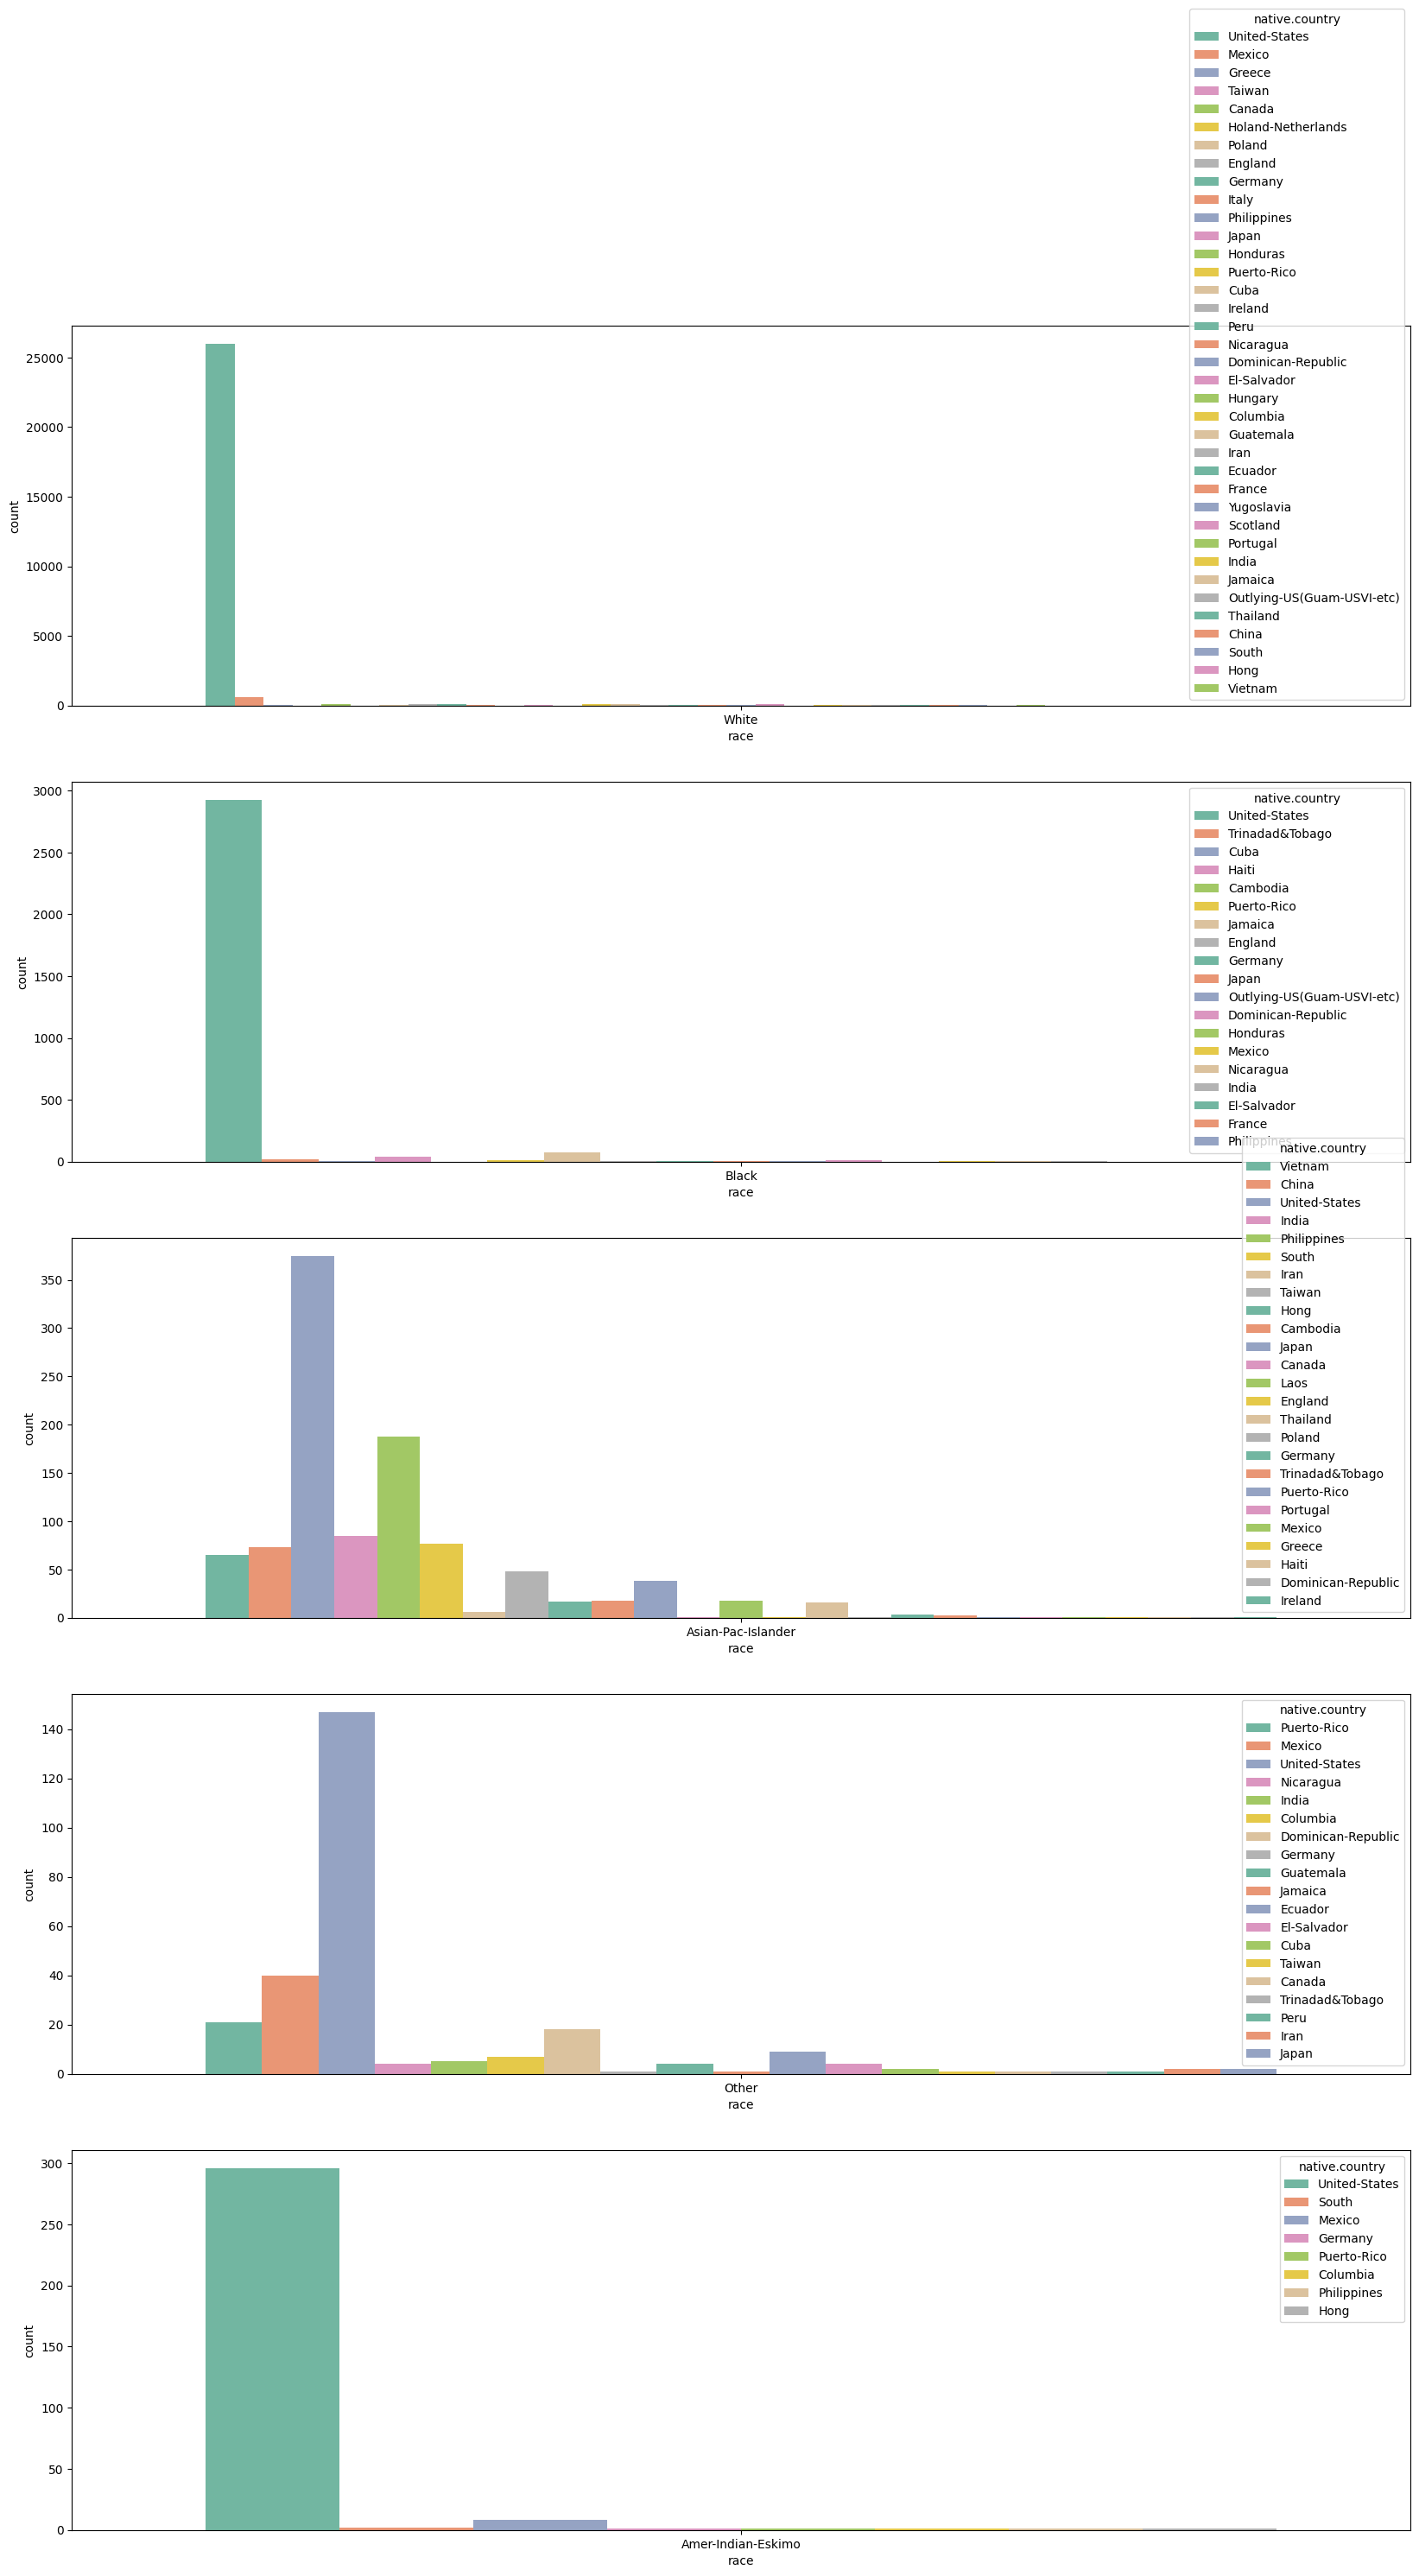

In [165]:
# Checking relotionship between race and native.countrty

plt.figure(figsize=(20,40))
k=1
for i in df['race'].unique():
  plt.subplot(6,1,k)
  sns.countplot(data=df[df['race']==i], x='race', hue='native.country', palette='Set2')
  k+=1

# Majority of the people are belonging to United states.

<AxesSubplot: >

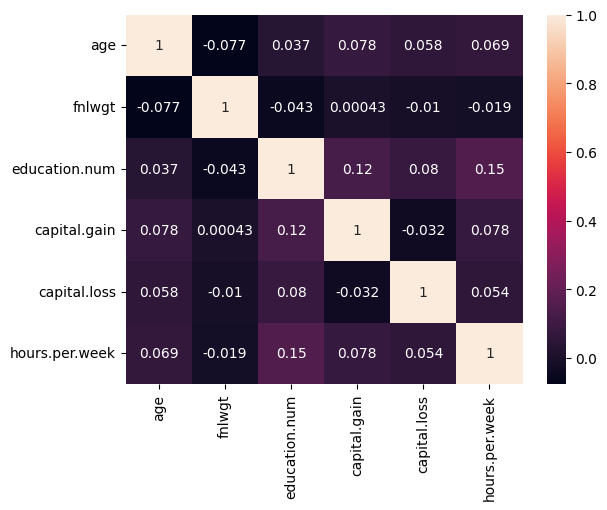

In [166]:
# Checking multicolinearity

sns.heatmap(df.corr(), annot=True)

In [167]:
census_features = ['age','fnlwgt','education.num','capital.gain','capital.loss','hours.per.week']

In [168]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

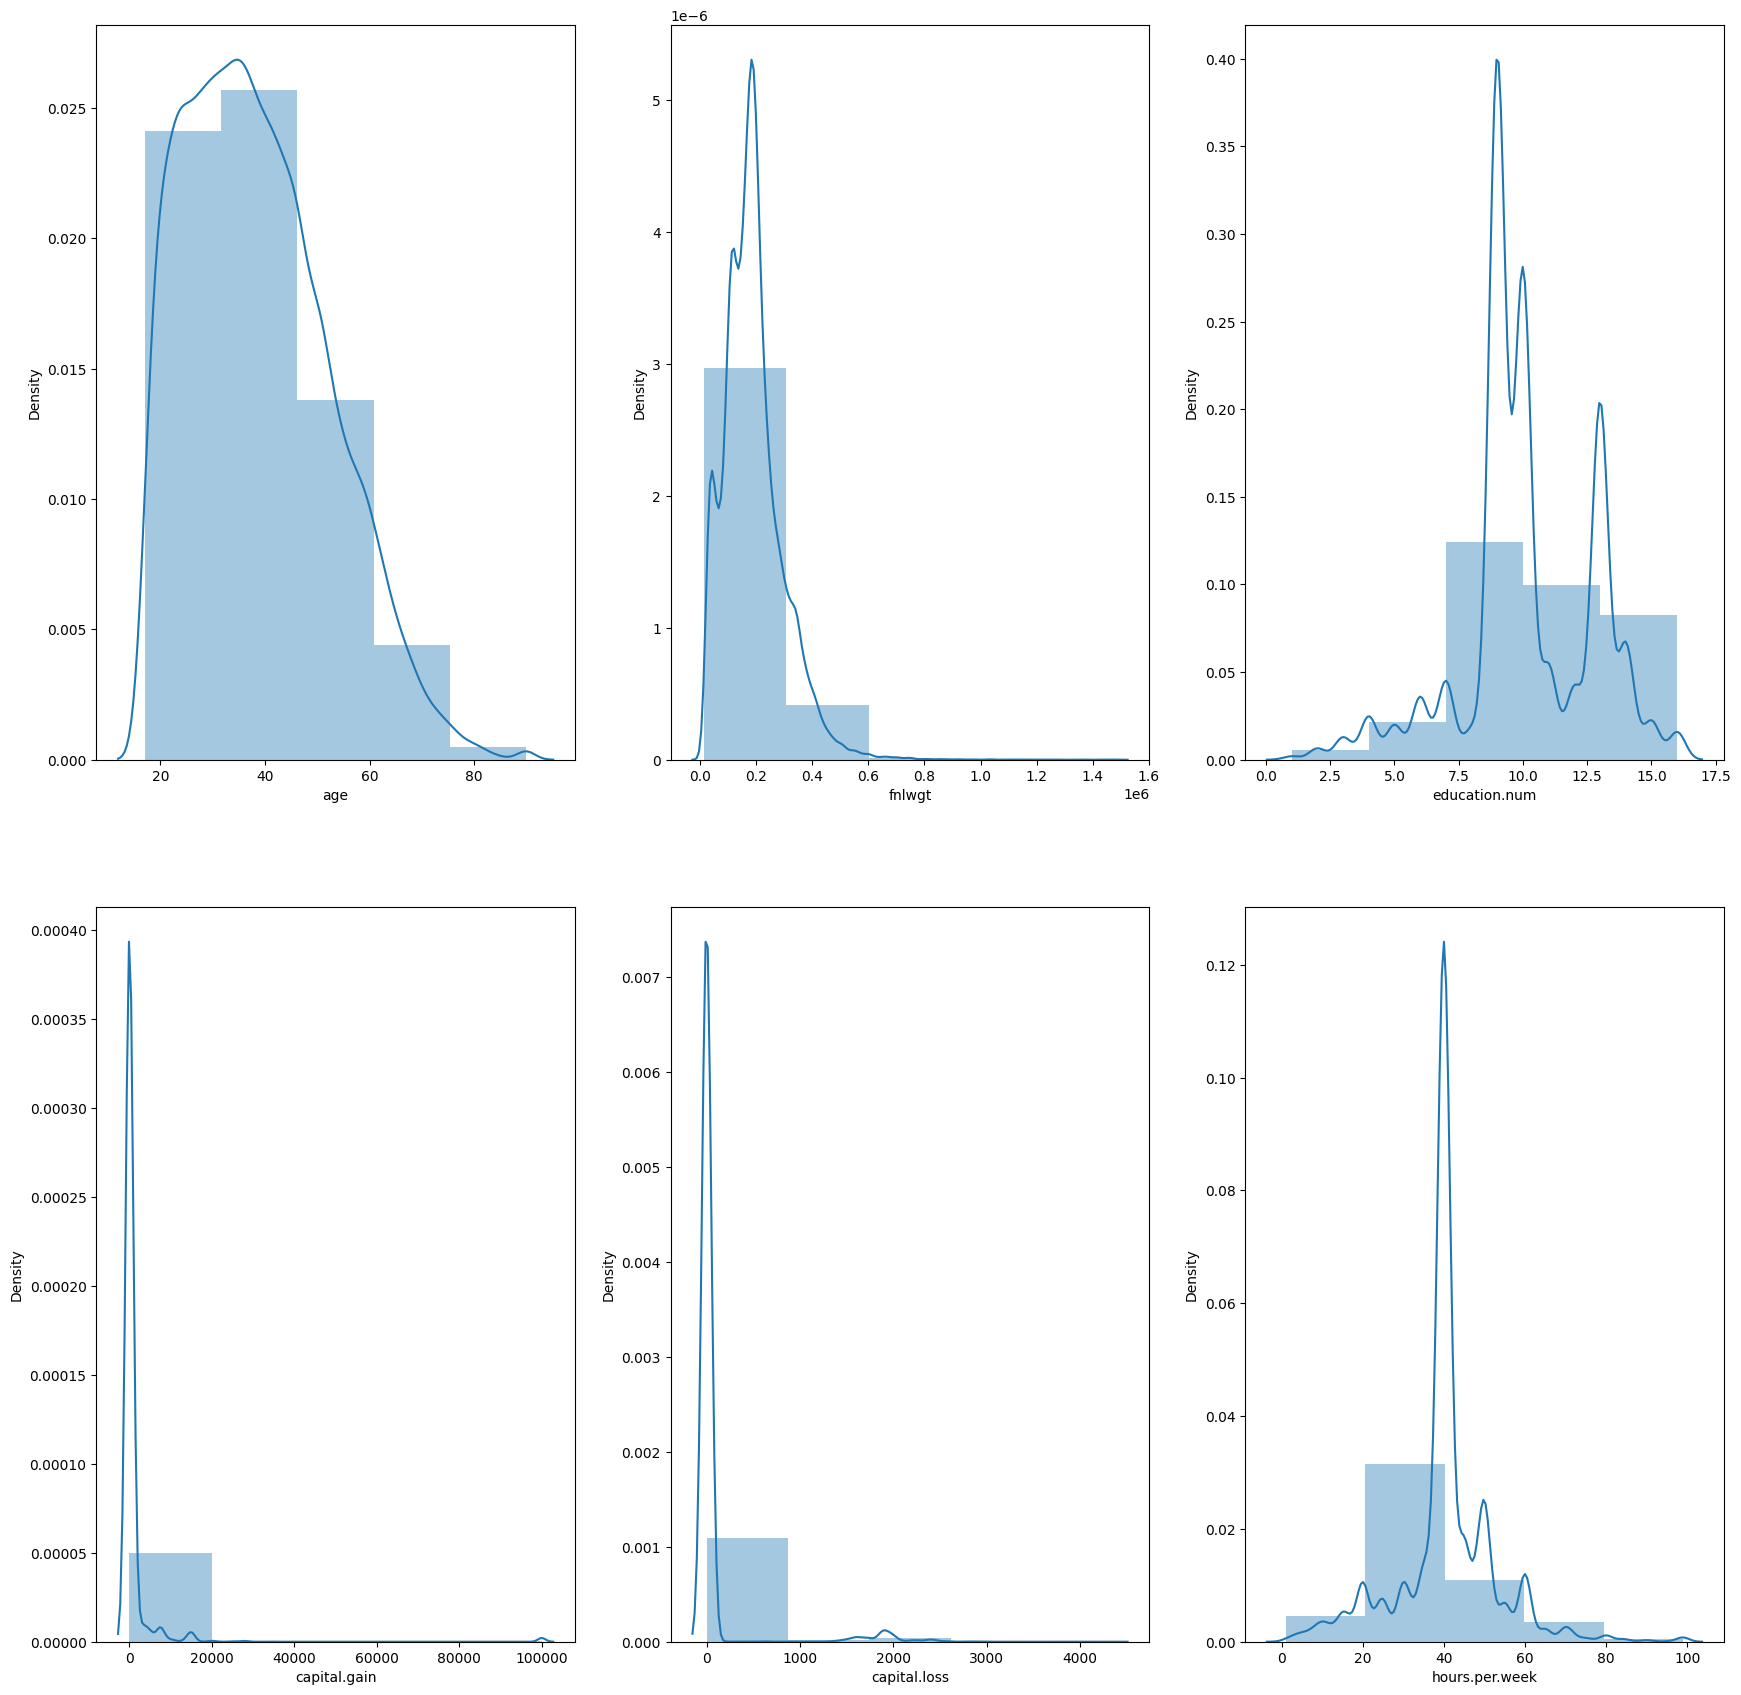

In [169]:
plt.figure(figsize=(21,21))
k=1
for feature in census_features:
  plt.subplot(2,3,k)
  sns.distplot(df[feature], bins=5, kde=True)
  k=k+1

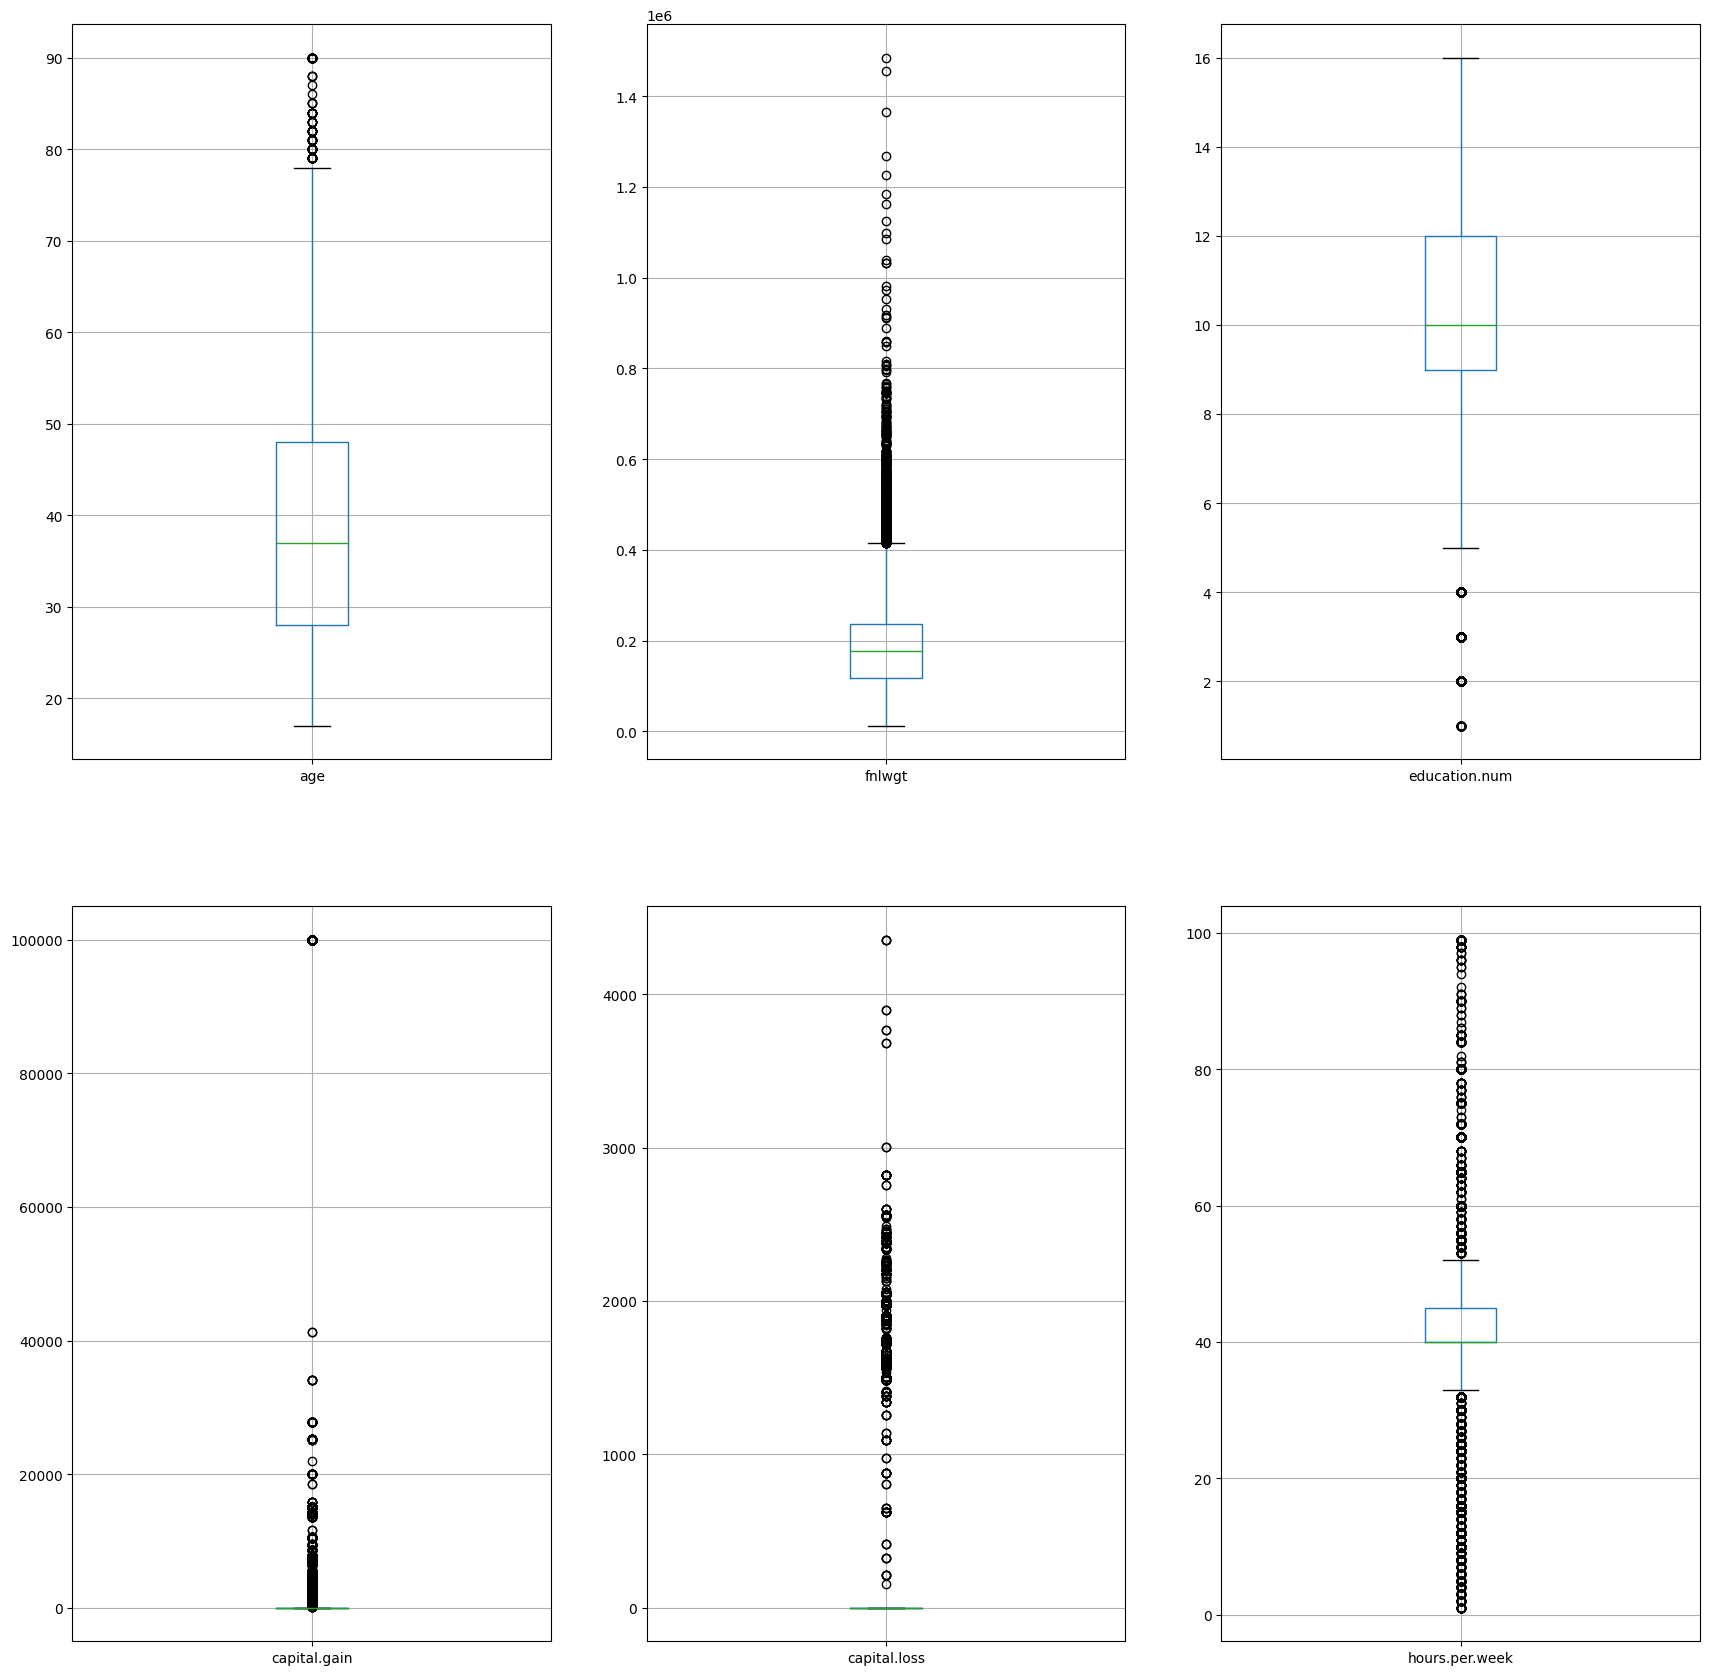

In [170]:
plt.figure(figsize=(21,21))
k=1
for feature in census_features:
  plt.subplot(2,3,k)
  df.boxplot(feature)
  k=k+1


In [171]:
df.drop(columns=['fnlwgt','education'],inplace=True)

In [172]:
# convert cateogrical data into numericals values
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['workclass']=le.fit_transform(df['workclass'].values)
df['marital.status']=le.fit_transform(df['marital.status'].values)
df['occupation']=le.fit_transform(df['occupation'].values)
df['relationship']=le.fit_transform(df['relationship'].values)
df['race']=le.fit_transform(df['race'].values)
df['sex']=le.fit_transform(df['sex'].values)
df['native.country']=le.fit_transform(df['native.country'].values)

In [173]:
df

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,3,9,6,0,1,4,0,0,4356,40,38,<=50K
1,82,3,9,6,3,1,4,0,0,4356,18,38,<=50K
2,66,3,10,6,0,4,2,0,0,4356,40,38,<=50K
3,54,3,4,0,6,4,4,0,0,3900,40,38,<=50K
4,41,3,10,5,9,3,4,0,0,3900,40,38,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,3,10,4,10,1,4,1,0,0,40,38,<=50K
32557,27,3,12,2,12,5,4,0,0,0,38,38,<=50K
32558,40,3,9,2,6,0,4,1,0,0,40,38,>50K
32559,58,3,9,6,0,4,4,0,0,0,40,38,<=50K


<AxesSubplot: >

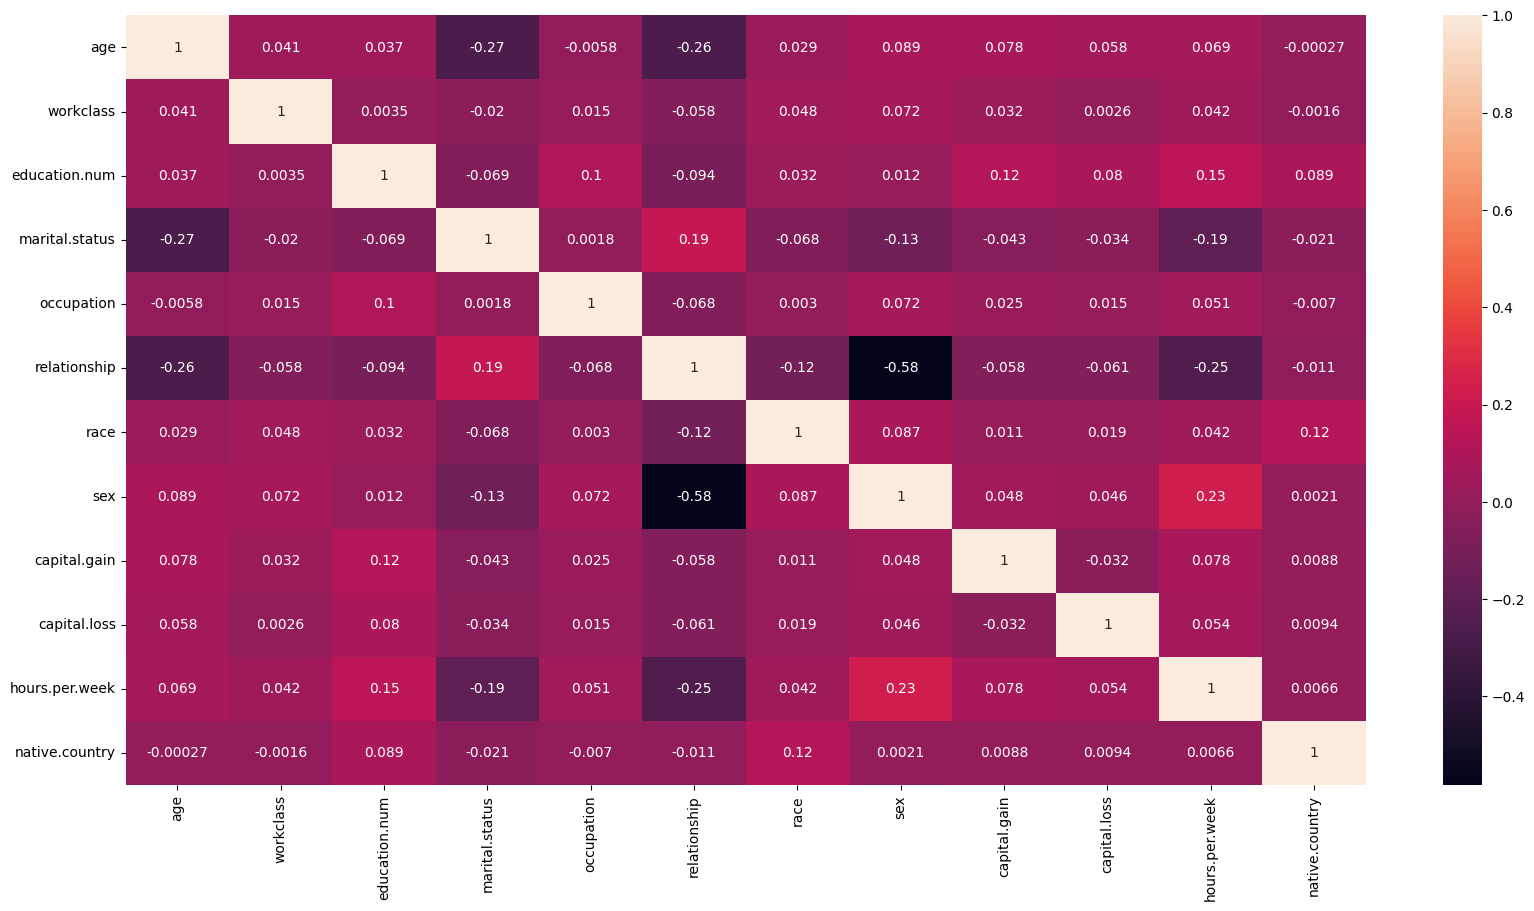

In [174]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)

In [175]:
census_features1 = ['age','workclass','education.num','marital.status','occupation','relationship','race','sex','capital.gain','capital.loss','hours.per.week','native.country']

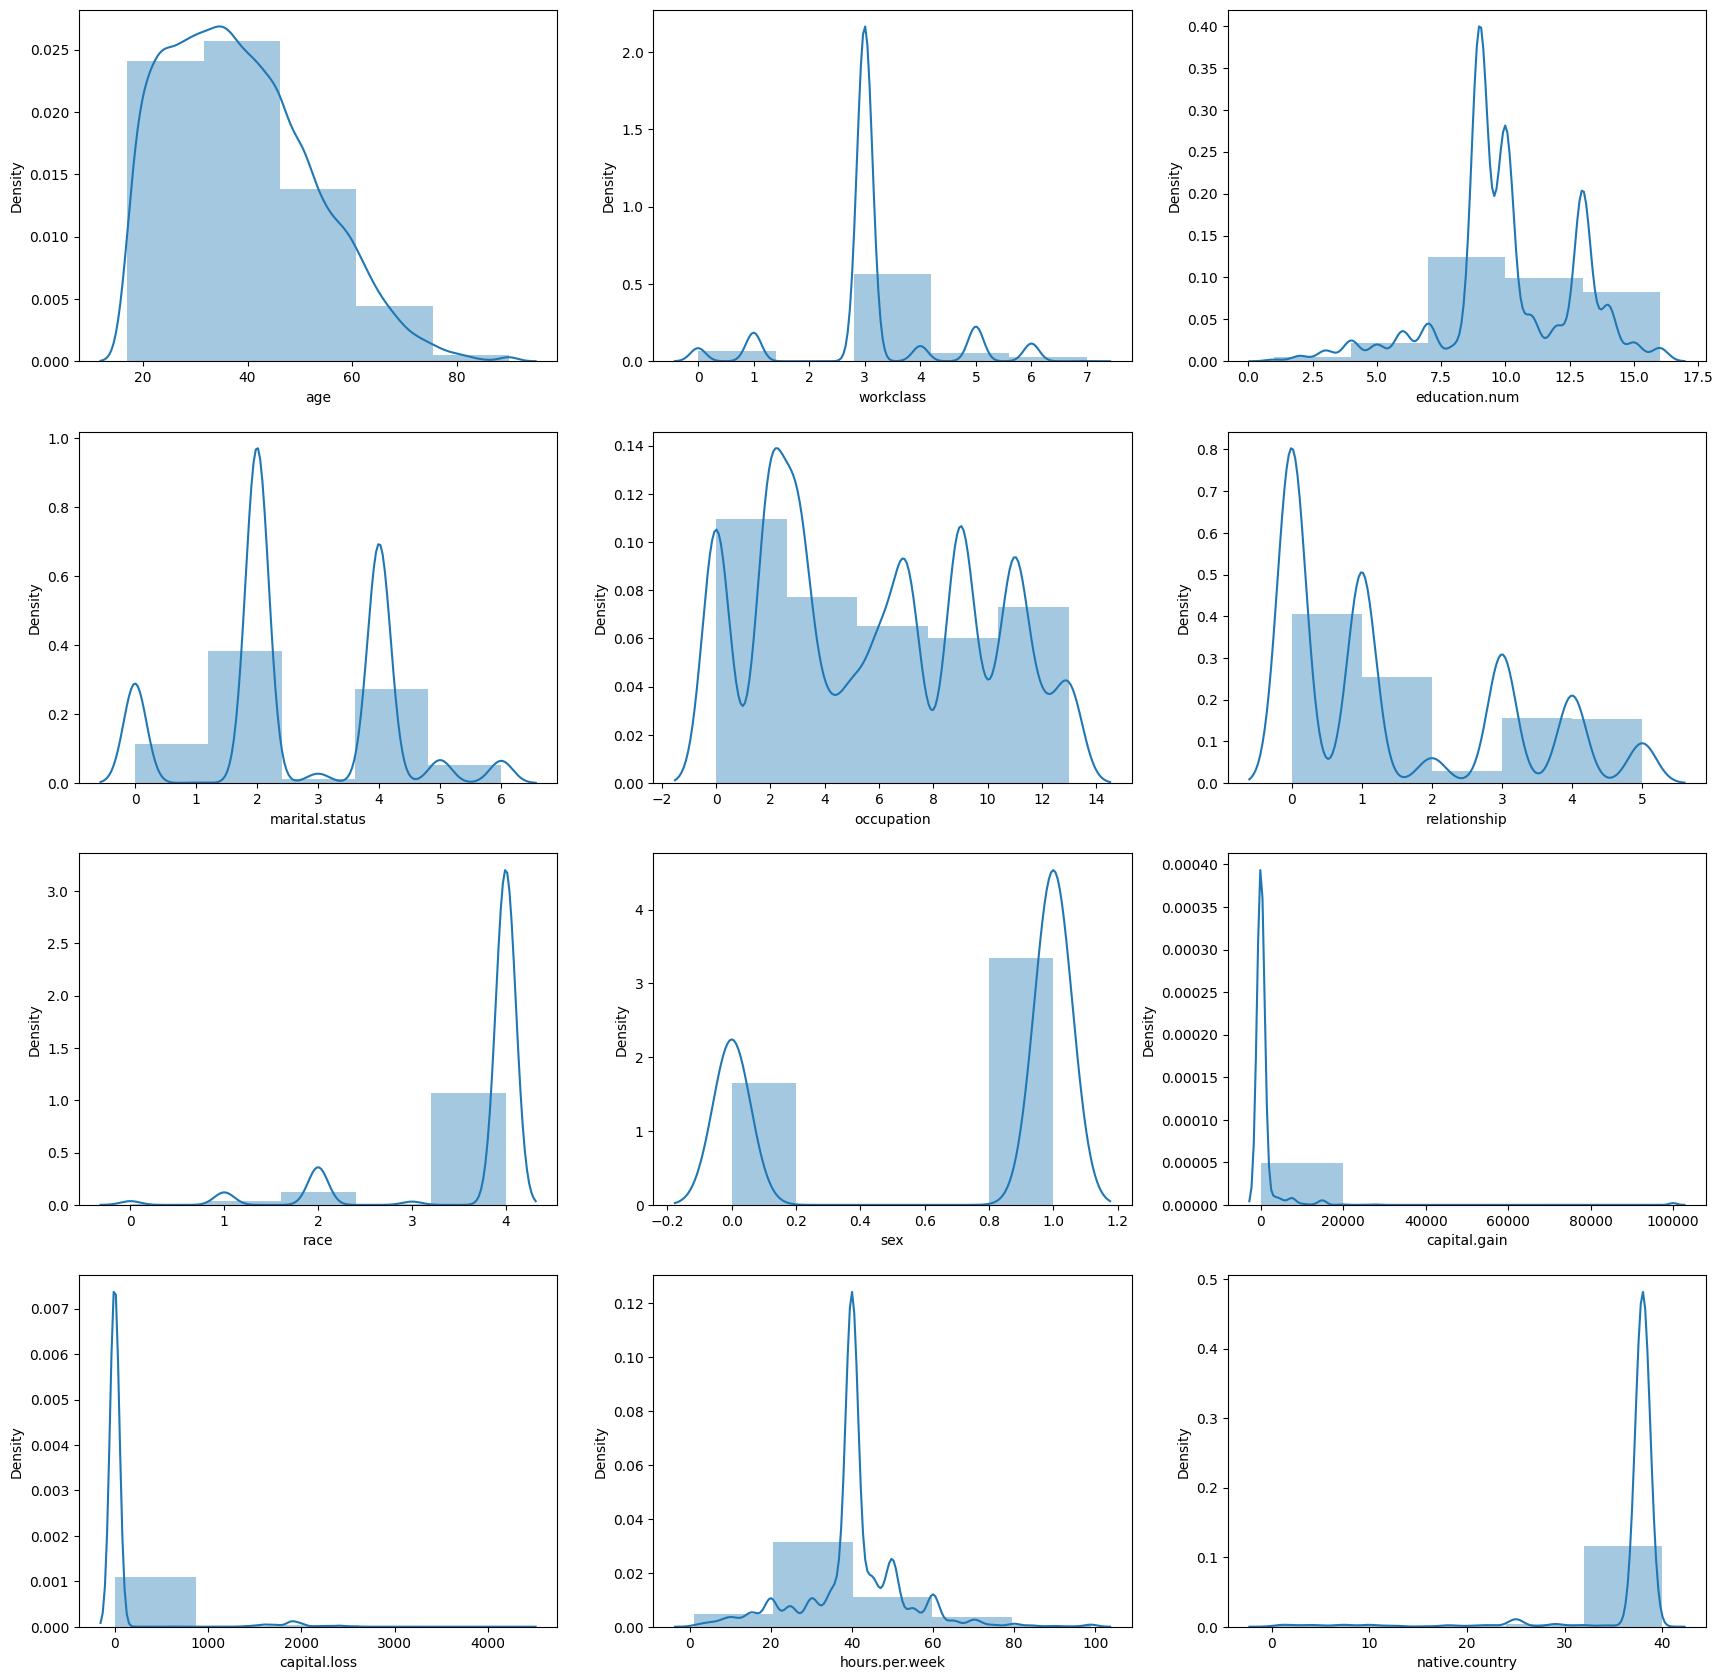

In [176]:
plt.figure(figsize=(21,21))
k=1
for feature in census_features1:
  plt.subplot(4,3,k)
  sns.distplot(df[feature], bins=5, kde=True)
  k=k+1

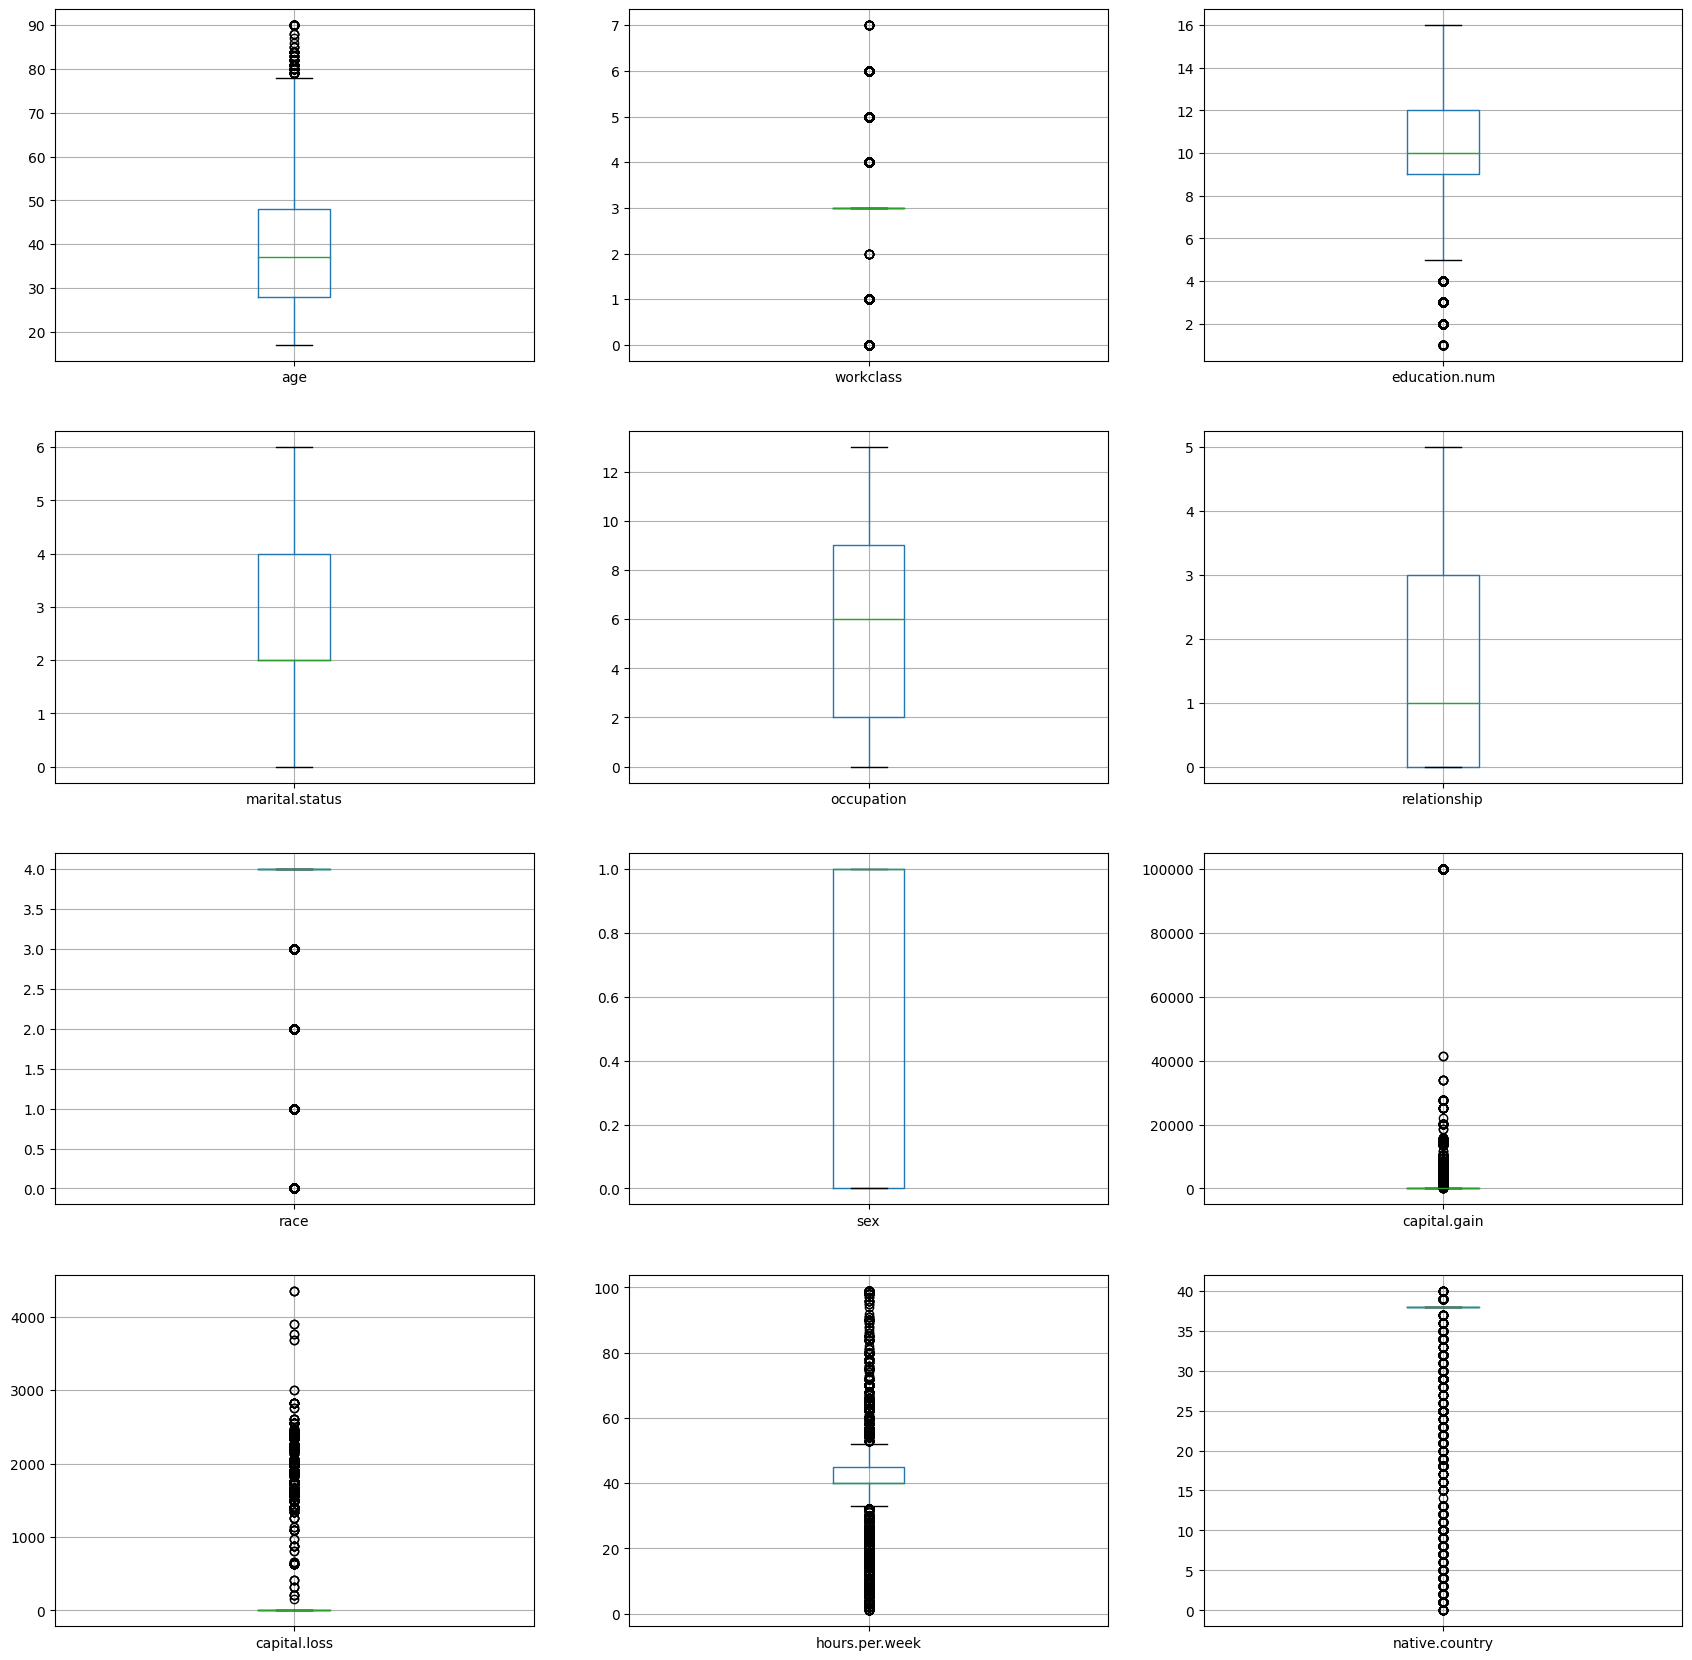

In [177]:
plt.figure(figsize=(21,21))
k=1
for feature in census_features1:
  plt.subplot(4,3,k)
  df.boxplot(feature)
  k=k+1

In [178]:
# check skewness and Kurtosis
df.skew()

age                0.558743
workclass          0.076469
education.num     -0.311676
marital.status    -0.013508
occupation         0.164033
relationship       0.786818
race              -2.435386
sex               -0.719293
capital.gain      11.953848
capital.loss       4.594629
hours.per.week     0.227643
native.country    -4.243158
dtype: float64

In [179]:
df.kurtosis()

age                -0.166127
workclass           2.280313
education.num       0.623444
marital.status     -0.536080
occupation         -1.248878
relationship       -0.768358
race                4.876310
sex                -1.482709
capital.gain      154.799438
capital.loss       20.376802
hours.per.week      2.916687
native.country     17.943432
dtype: float64

In [180]:
#split data into x and y
x = df.drop(columns=['income'], axis=1)
y = df.income.values

In [181]:
x

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,90,3,9,6,0,1,4,0,0,4356,40,38
1,82,3,9,6,3,1,4,0,0,4356,18,38
2,66,3,10,6,0,4,2,0,0,4356,40,38
3,54,3,4,0,6,4,4,0,0,3900,40,38
4,41,3,10,5,9,3,4,0,0,3900,40,38
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,3,10,4,10,1,4,1,0,0,40,38
32557,27,3,12,2,12,5,4,0,0,0,38,38
32558,40,3,9,2,6,0,4,1,0,0,40,38
32559,58,3,9,6,0,4,4,0,0,0,40,38


In [182]:
y

array(['<=50K', '<=50K', '<=50K', ..., '>50K', '<=50K', '<=50K'],
      dtype=object)

# Train Test Split

In [183]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [184]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((22792, 12), (9769, 12), (22792,), (9769,))

In [185]:
# treat skewness
def Outlier_Management(df1, var):
  IQR = df1[var].quantile(0.75) - df1[var].quantile(0.25)
  Lower_Fence = df1[var].quantile(0.25) - (IQR * 3)
  Upper_Fence = df1[var].quantile(0.75) + (IQR * 3) 

  df1[var] = np.where(df1[var] > Upper_Fence, Upper_Fence, 
                      np.where(df1[var] < Lower_Fence, Lower_Fence, df1[var]))
  
  return df1[var]

In [186]:
ls = ['age','education.num','relationship','race','capital.gain','capital.loss','hours.per.week','native.country']
for col in [x_train, x_test]:
  for i in ls:
    Outlier_Management(col, i)

In [187]:
df.describe()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,3.094438,10.080679,2.611836,5.773656,1.446362,3.665858,0.669205,1077.648844,87.303830,40.437456,36.417155
std,13.640433,1.107194,2.572720,1.506222,4.043346,1.606771,0.848806,0.470506,7385.292085,402.960219,12.347429,6.056047
min,17.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,3.000000,9.000000,2.000000,2.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,38.000000
50%,37.000000,3.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,38.000000
75%,48.000000,3.000000,12.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,38.000000
max,90.000000,7.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,40.000000


In [188]:
# convert cateogrical data into numericals values

In [189]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = np.array(le.fit_transform(y_train))
y_test = np.array(le.transform(y_test))

In [190]:
y_train

array([0, 1, 0, ..., 0, 1, 1])

In [191]:
y_test

array([0, 0, 0, ..., 0, 0, 1])

In [193]:
x_test.shape, x_train.shape,y_train.shape, y_test.shape

((9769, 12), (22792, 12), (22792,), (9769,))

# Feature Scaling

In [194]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

# Model Training

In [200]:
parameters = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'splitter' : ['best', 'random'],
    'max_depth' : [5,6,7,8,9,10,11,12,13,14,15],
    'max_features' : ['auto', 'sqrt', 'log2']
}

In [201]:
from sklearn.model_selection import GridSearchCV

In [202]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
cv=GridSearchCV(model, param_grid=parameters, cv=10, scoring='accuracy')

In [203]:
cv.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [204]:
cv.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'log2',
 'splitter': 'best'}

# Predictions

In [205]:
y_pred = cv.predict(x_test)

In [206]:
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [207]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [1 1]]


# Check for overfitting and underfitting

In [208]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(cv.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(cv.score(x_test, y_test)))

Training set score: 0.8403
Test set score: 0.8224


# Confusion Matrix

In [209]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[6823  587]
 [1148 1211]]


0.8223973794656567

In [210]:
from sklearn.metrics import classification_report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89      7971
           1       0.51      0.67      0.58      1798

    accuracy                           0.82      9769
   macro avg       0.72      0.76      0.73      9769
weighted avg       0.85      0.82      0.83      9769



In [211]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [212]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8224


In [213]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1776


In [214]:
# print precision score

precision = TP / float(TP + FP)

print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9208


In [215]:
# print recall score

recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.8560


In [216]:
true_positive_rate = TP / float(TP + FN)

print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.8560


In [217]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.6735


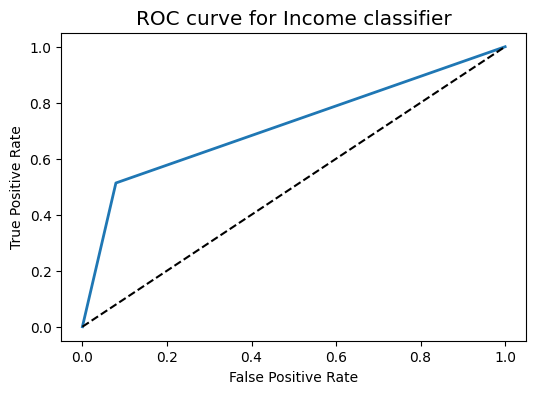

In [218]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label = 1)

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Income classifier')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive Rate')

plt.show()